## Explore

### Stage 1

In [1]:
import numpy as np
import pandas as pd
import wrangle

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#For statistical analysis
import scipy.stats as stats

#For clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Acquire the data
zillow = wrangle.wrangle_zillow()

In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67783 entries, 0 to 77380
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bathroom_count             67783 non-null  float64
 1   quality_type               67783 non-null  float64
 2   home_square_feet           67783 non-null  float64
 3   latitude                   67783 non-null  float64
 4   longitude                  67783 non-null  float64
 5   room_count                 67783 non-null  float64
 6   logerror                   67783 non-null  float64
 7   heating_system_desc        67783 non-null  object 
 8   county                     67783 non-null  object 
 9   age                        67783 non-null  float64
 10  acres                      67783 non-null  float64
 11  tax_rate                   67783 non-null  float64
 12  structure_dollar_per_sqft  67783 non-null  float64
 13  land_dollar_per_sqft       67783 non-null  flo

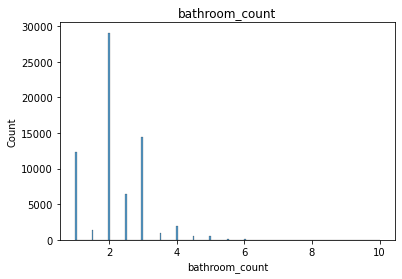

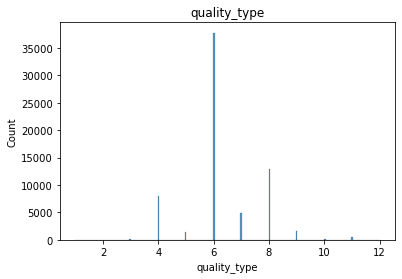

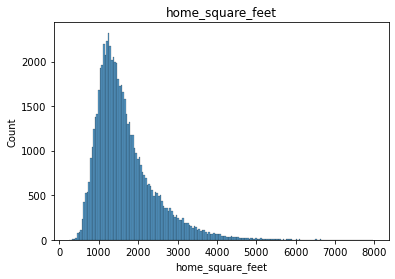

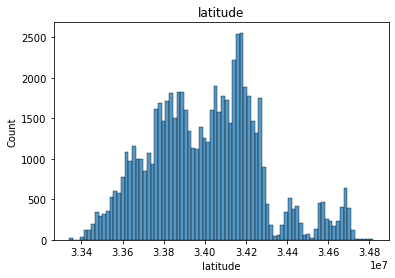

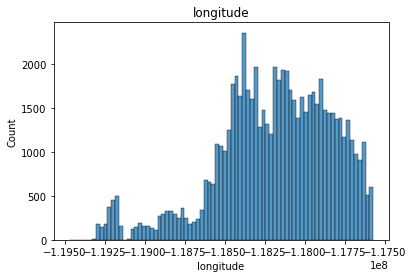

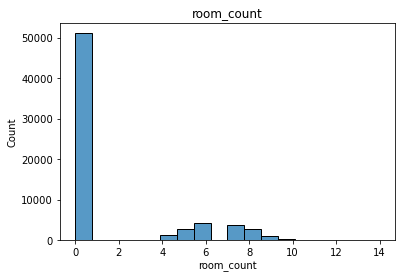

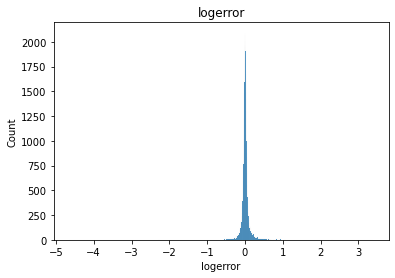

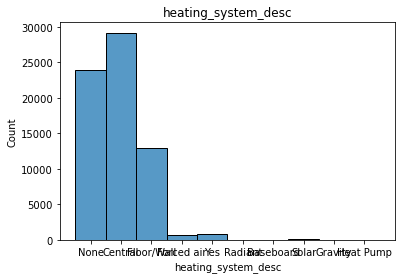

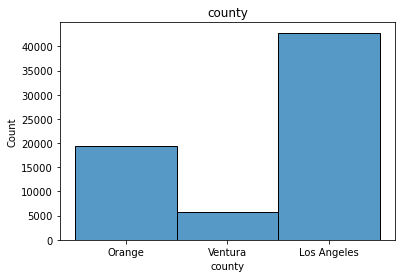

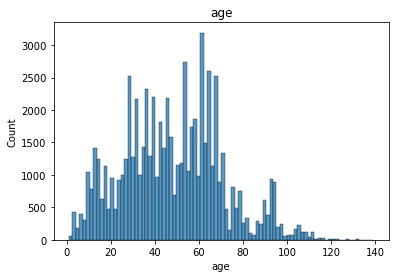

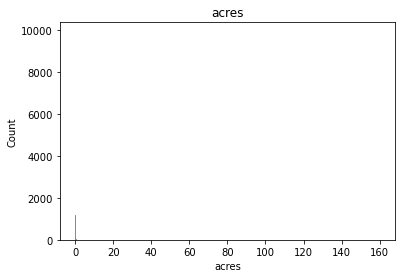

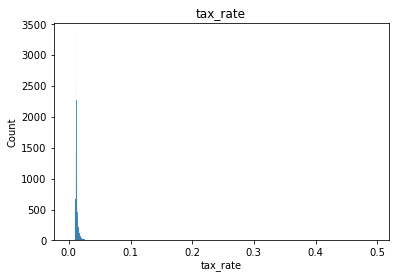

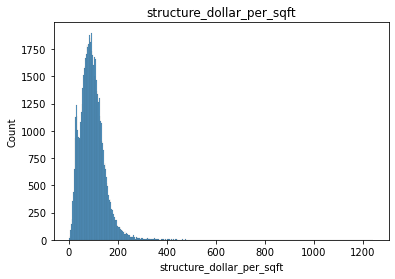

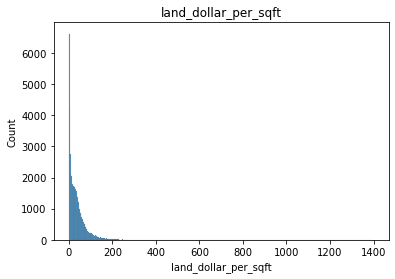

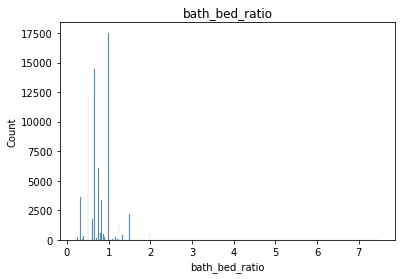

In [4]:
#Show individual distributions
wrangle.get_dists(zillow)

In [5]:
#Split into train, validate, and test
train, validate, test = wrangle.train_validate_test_split(zillow)
train.shape, validate.shape, test.shape

((37958, 15), (16268, 15), (13557, 15))

In [6]:
#Since a seaborn pairplot would take too long and there would be too many graphs,
#Just create a loop that creates individual plots of each numeric value agains the target
num_cols = train.select_dtypes('number').columns
num_cols

Index(['bathroom_count', 'quality_type', 'home_square_feet', 'latitude',
       'longitude', 'room_count', 'logerror', 'age', 'acres', 'tax_rate',
       'structure_dollar_per_sqft', 'land_dollar_per_sqft', 'bath_bed_ratio'],
      dtype='object')

<Figure size 1152x576 with 0 Axes>

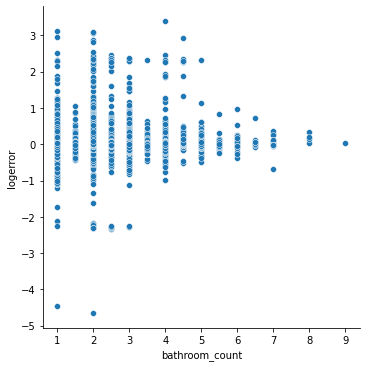

<Figure size 1152x576 with 0 Axes>

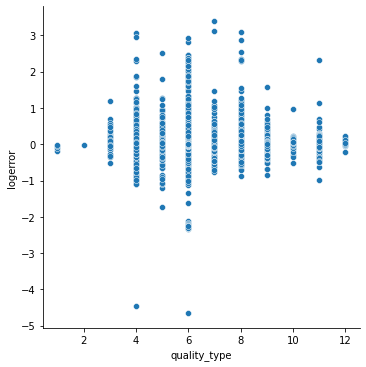

<Figure size 1152x576 with 0 Axes>

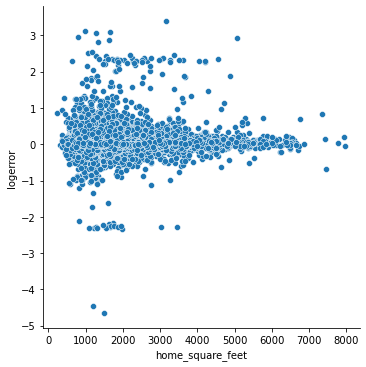

<Figure size 1152x576 with 0 Axes>

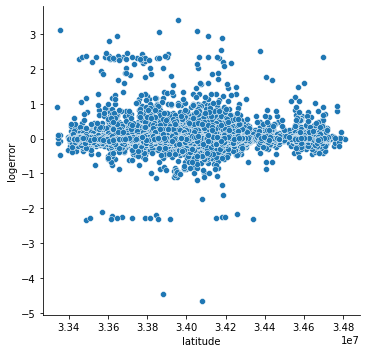

<Figure size 1152x576 with 0 Axes>

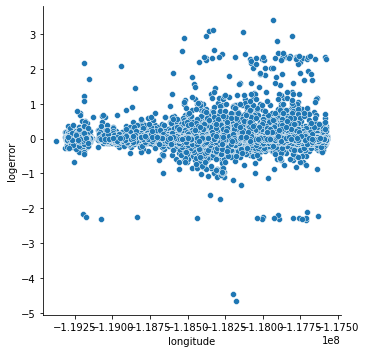

<Figure size 1152x576 with 0 Axes>

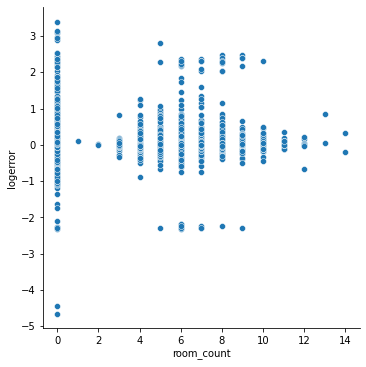

<Figure size 1152x576 with 0 Axes>

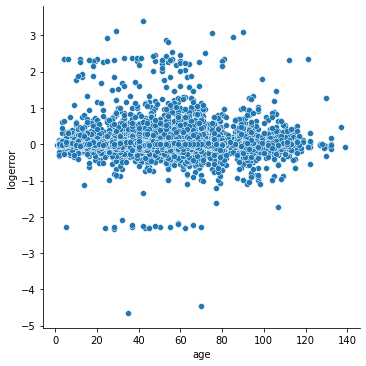

<Figure size 1152x576 with 0 Axes>

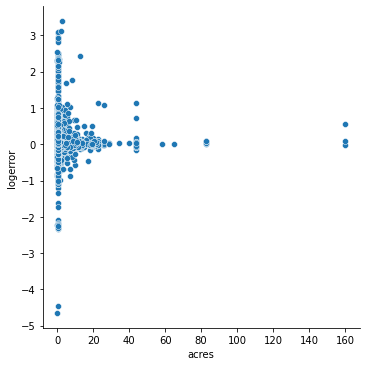

<Figure size 1152x576 with 0 Axes>

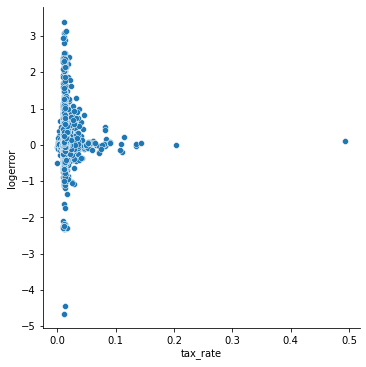

<Figure size 1152x576 with 0 Axes>

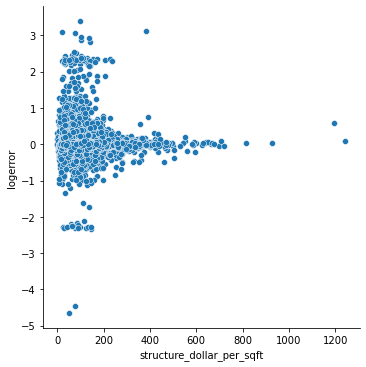

<Figure size 1152x576 with 0 Axes>

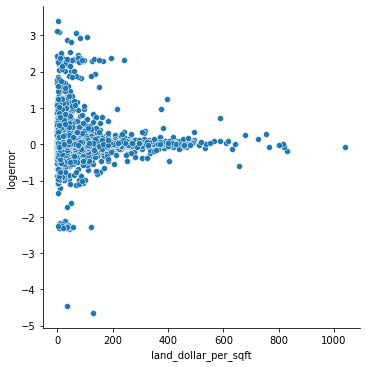

<Figure size 1152x576 with 0 Axes>

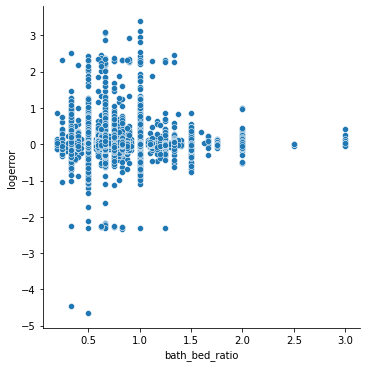

In [7]:
for col in num_cols:
    if col == 'logerror':
        continue
    else:
        plt.figure(figsize=(16, 8))
        sns.relplot(x = col, y = 'logerror', data = train)
        plt.show()

Key Takeaways:

* logerror decreases as bathroom_count increases
* Greatest logerror exists for average homes. Quality types 4 through 8
* As home size increases, logerror decreases. There are two groups among houses that are smaller (< 4000 sqft). One group has higher logerror than the average, while the other has lower logerror than the average. What sets these smaller homes apart from the others?
* Same grouping seen in smaller latitude values.
* Same grouping seen in larger longitude values.
* Greatest range of logerror exists for properties with room_count = 0.
* Age has a similar plot to the latitude plot. Perhaps age, latitude, and longitude would make good features for clustering.
* Smaller plots of land have the greatest logerror
* Those with lower tax rates (< .5) have a much greater range of logerror than others.
* Properties with a lower structure_dollar_per_sqft (< 300) have a much higher positive logerror.
* Properties with a lower land_dollar_per_sqft (<200) have a much higher positive logerror. Perhaps these last two features would be good candidates for clustering.
* There is a greater range of logerror for properties with bath_bed_ratio less than about 1.5.

Now take a look at the categorical variables with the target.

In [8]:
cat_cols = train.select_dtypes('object').columns
cat_cols

Index(['heating_system_desc', 'county'], dtype='object')

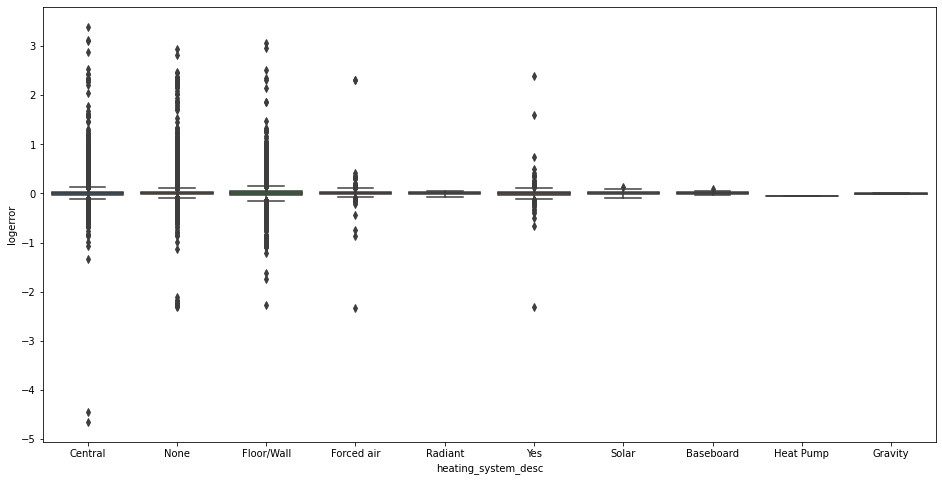

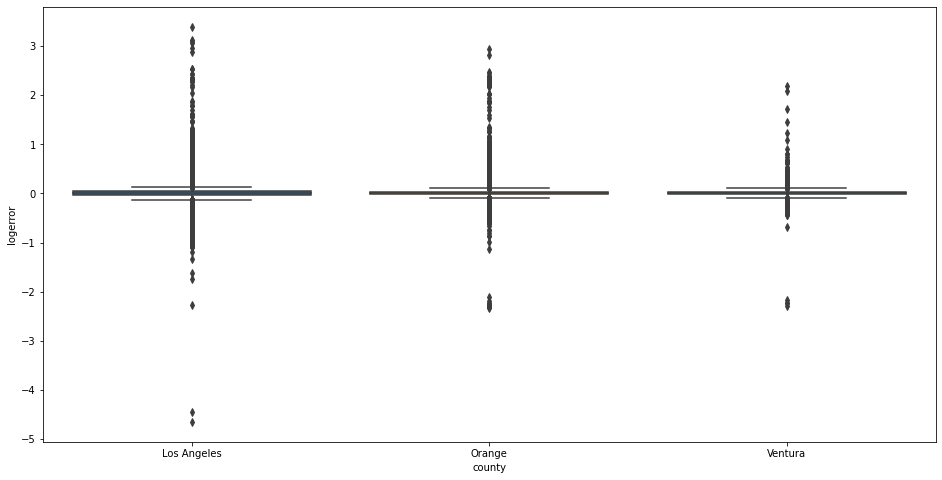

In [9]:
for col in cat_cols:
    plt.figure(figsize=(16,8))
    sns.boxplot(x = col, y = 'logerror', data = train)
    plt.show()

Not seeing any dramatic differences with the boxplots. Let's apply the cat vars as hues in the other charts instead.

<Figure size 1152x576 with 0 Axes>

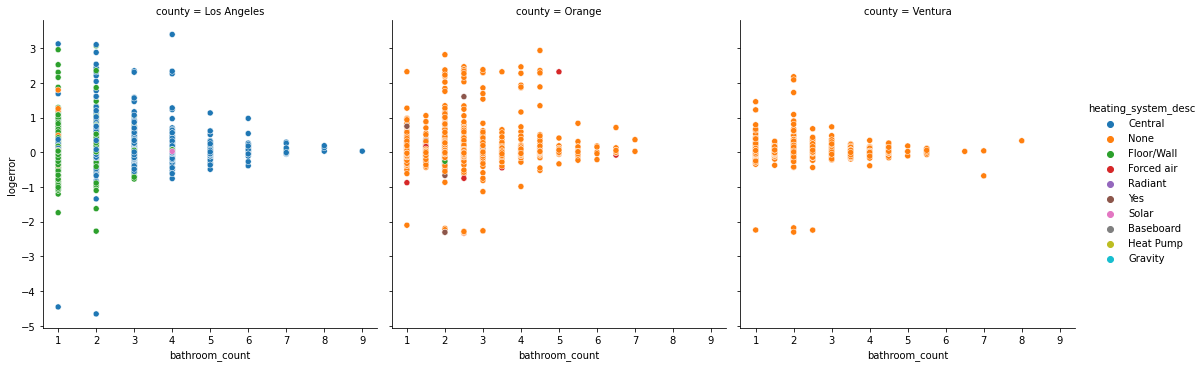

<Figure size 1152x576 with 0 Axes>

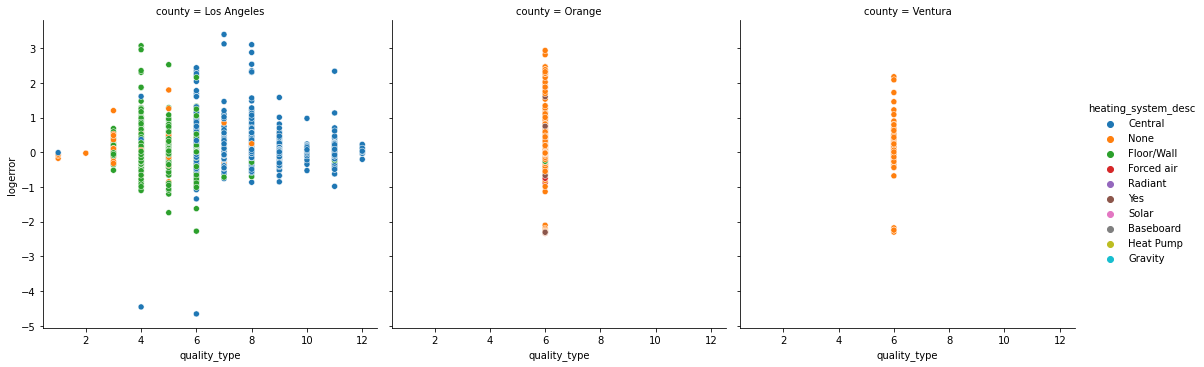

<Figure size 1152x576 with 0 Axes>

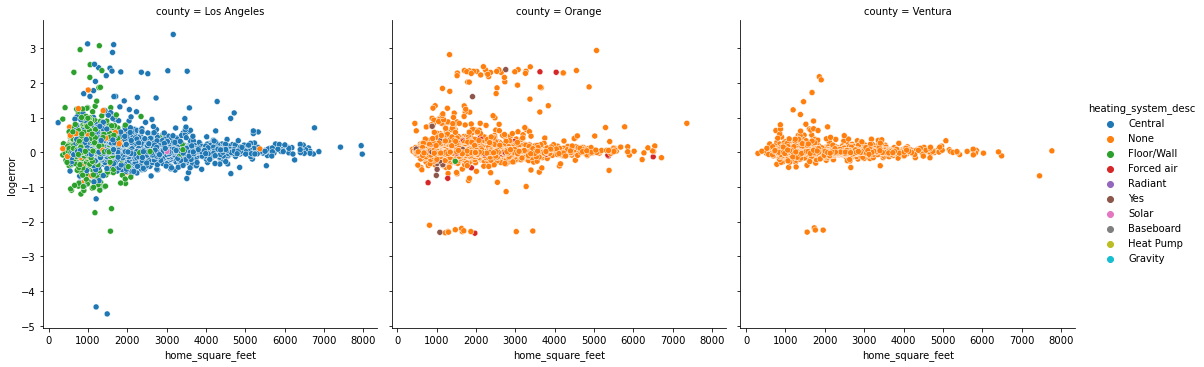

<Figure size 1152x576 with 0 Axes>

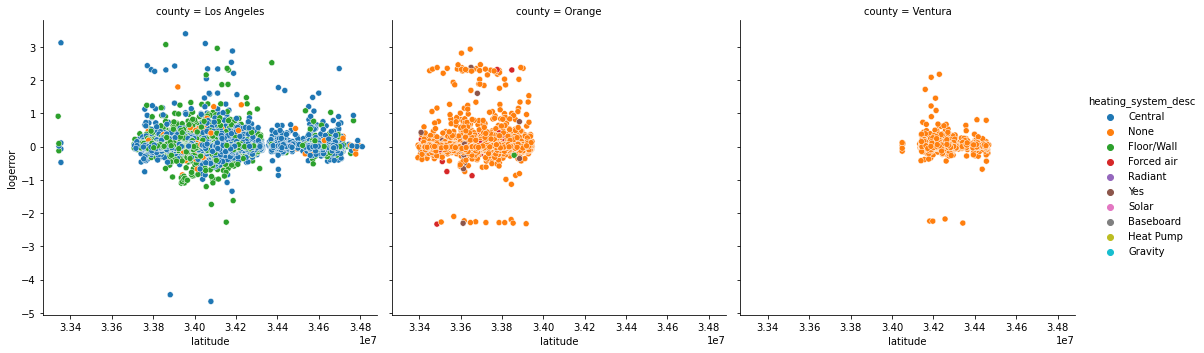

<Figure size 1152x576 with 0 Axes>

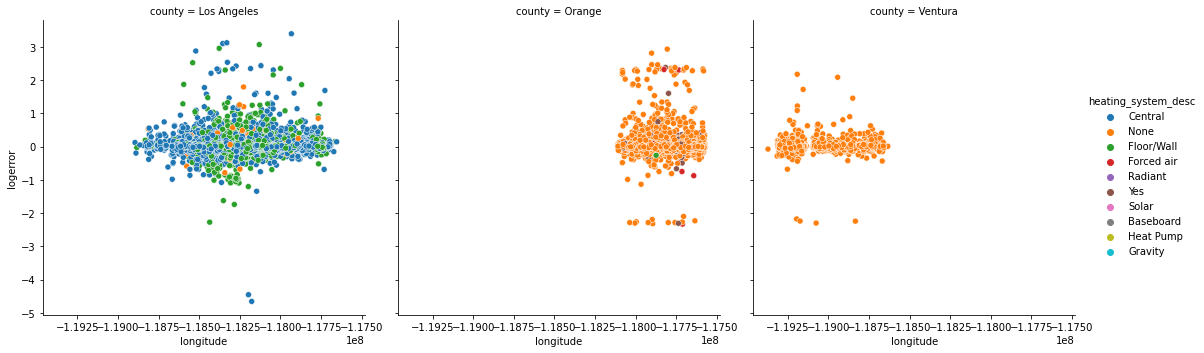

<Figure size 1152x576 with 0 Axes>

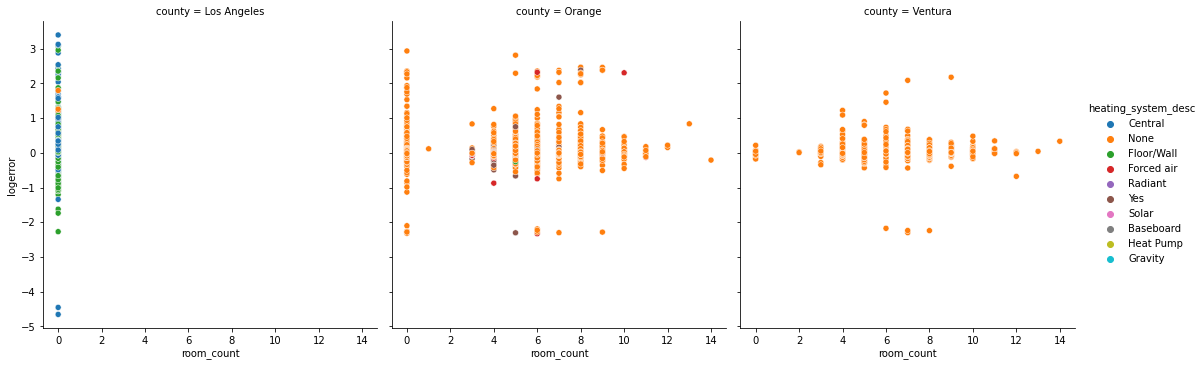

<Figure size 1152x576 with 0 Axes>

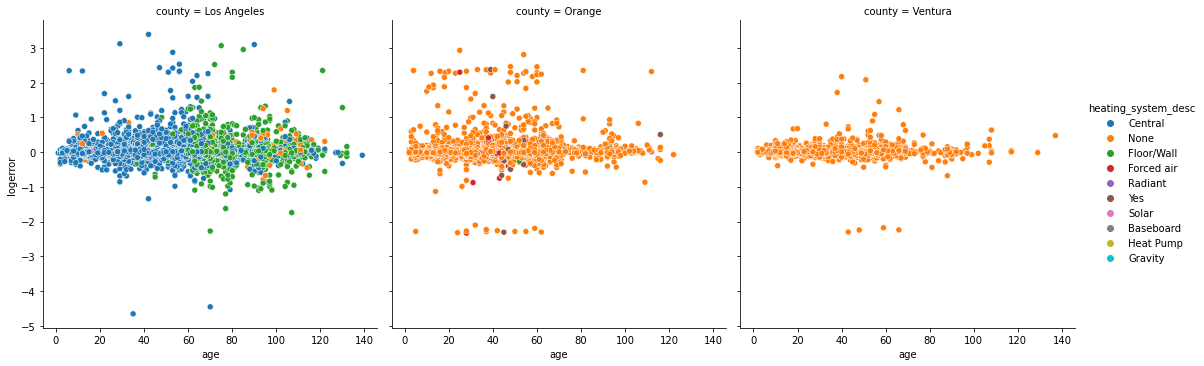

<Figure size 1152x576 with 0 Axes>

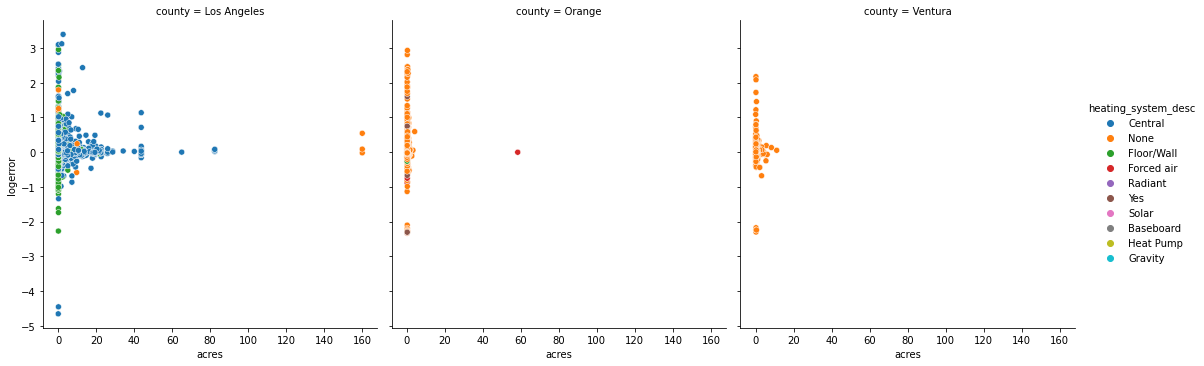

<Figure size 1152x576 with 0 Axes>

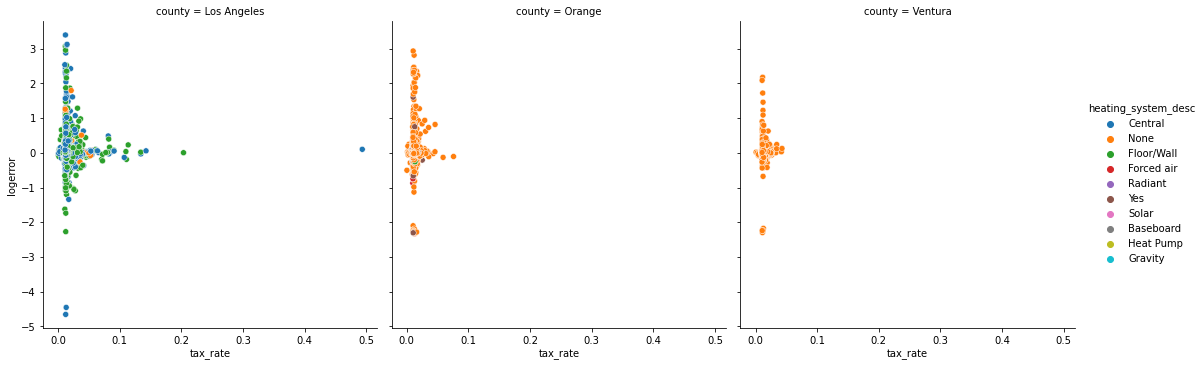

<Figure size 1152x576 with 0 Axes>

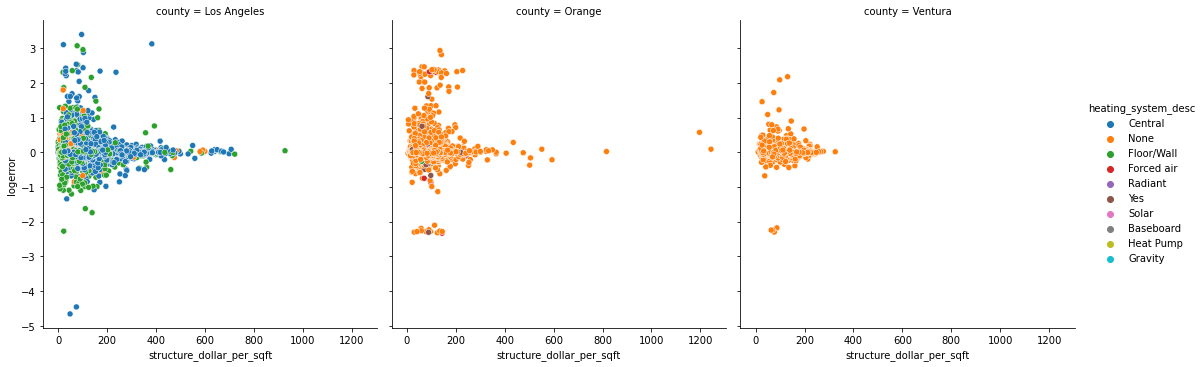

<Figure size 1152x576 with 0 Axes>

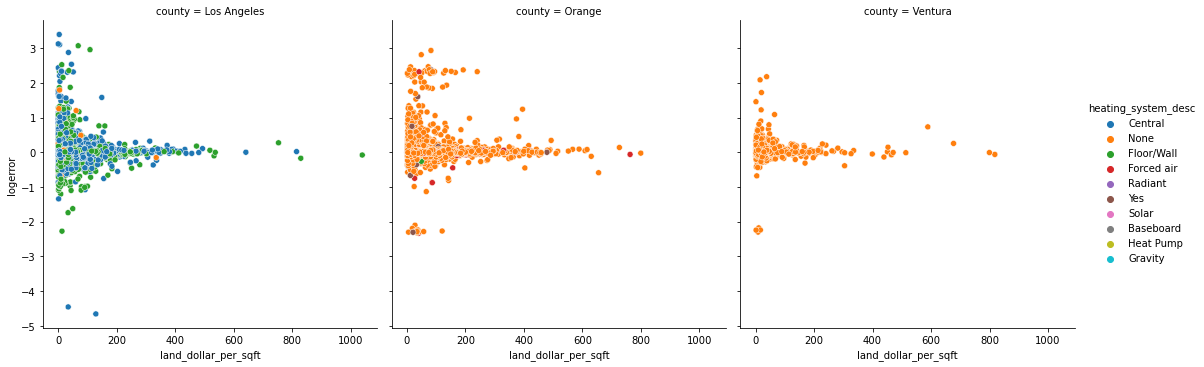

<Figure size 1152x576 with 0 Axes>

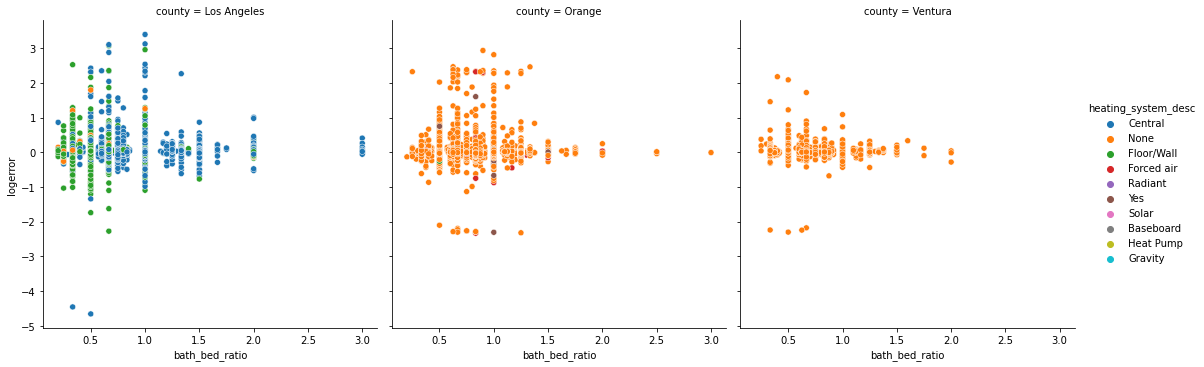

In [10]:
for col in num_cols:
    if col == 'logerror':
        continue
    else:
        plt.figure(figsize=(16, 8))
        sns.relplot(x = col, y = 'logerror', col = 'county', hue = 'heating_system_desc', data = train)
        plt.show()

Key Takeaways:

* Most of the properties in Orange and Ventura counties have no heating_system at all. The properties in LA county with the highest logerror tend to be Floor/Wall system types with a lower bathroom_count
* Orange and Ventura counties have only the quality_type of 6 with a wide range of logerror. Lower quality homes in LA county tend to have Floor/Wall systems and higher quality homes have Central systems, but there is no clear pattern in logerror.
* Smaller homes in LA County (<2000) tend to have Floor/Wall systems with the same decreasing trend in logerror as home size increases. Those two distinct groups mentioned before are most prevalent in Orange county properties. The same trend in logerror exists in Orange and Ventura counties as well.
* The cheaper, lower quality homes in LA county are between 3.38 and 3.41 latitude and around -1.1825x10^8 longitude.
* LA County only has room_count = 0. Orange and Ventura counties have many more rooms, but Orange county properties that have 0 rooms have a wide range of logerror.
* Newer homes (< 60) in LA County have Central heating systems, while the older homes tend to have Floor/Wall systems. There is no clear pattern for Orange and Ventura counties.
* Properties in Orange and Ventura county appear to have smaller acres than properties in LA county. 
* LA County seems to have higher property tax rates than Orange and Ventura Counties.
* In LA County, homes with lower structure_dollar_per_sqft (< 200) and Floor/Wall heating systems tend to have a negative logerror. Properties with low structure_dollar_per_sqft and Central heating systems tend to have a postive logerror. Aside from the previously mentioned groups above and below the mean logerror in Orange county, there are no other clear patterns.

### Statistical Analysis
***

__Hypothesis 1__

$H_0$: Average logerror for properties with Floor/Wall heating systems is >= Average logerror for properties with Central heating systems.
    
$H_a$: Average logerror for properties with Floor/Wall heating systems is < Average logerror for properties with Central heating systems.

alpha = 0.05

In [11]:
#Assume variances are not equal
t, p = stats.ttest_ind(train[train.heating_system_desc == 'Floor/Wall'].logerror, train[train.heating_system_desc == 'Central'].logerror, equal_var = False)
t, p

(-0.8280345003158724, 0.4076671850494282)

Since p-value is greater than 0.05, we fail to reject the null hypothesis. Average logerror for properties with Floor/Wall heating systems is not significantly less than the average logerror for properties with Central heating systems.

__Hypothesis 2__

$H_0$: home_square_feet is not linearly correlated with logerror.
    
$H_a$: home_square_feet is linearly correlated with logerror.
    
alpha = 0.05

In [12]:
corr, p = stats.pearsonr(train.home_square_feet, train.logerror)
corr, p

(0.04774783861034919, 1.3072349673671478e-20)

Since p-value is less than 0.05, we reject the null hypothesis. Home_square_feet is linearly correlated with logerror, but the correlation is extremely weak with a correlation coefficient of about 0.05. This may not be useful.

__Hypothesis 3__

$H_0$: The average logerror for properties in Los Angeles county <= The average logerror for properties in Ventura county.

$H_a$: The average logerror for properties in Los Angeles county > The average logerror for properties in Ventura county.

alpha = 0.05

In [13]:
t, p = stats.ttest_ind(train[train.county == 'Los Angeles'].logerror, train[train.county == 'Ventura'].logerror, equal_var = False)
t, p

(-0.10770420189840343, 0.9142354373527628)

Since p-value is greater than 0.05, we fail to reject the null hypothesis. The average logerror for properties in Los Angeles county is not significantly greater than the average logerror for properties in Ventura county.

__Hypothesis 4__

$H_0$: The average logerror for properties in Los Angeles county >= The average logerror for properties in Orange county.
    
$H_a$: The average logerror for properties in Los Angeles county < The average logerror for properties in Orange county.
    
alpha = 0.05

In [14]:
t, p = stats.ttest_ind(train[train.county == 'Los Angeles'].logerror, train[train.county == 'Orange'].logerror, equal_var = False)
t, p

(-2.761686055670494, 0.005756283437029695)

Since the p-value is less than 0.05 and the test statistic is negative, we reject the null hypothesis. The average logerror for properties in Los Angeles county is significantly less than the average logerror for properties in Orange county.

### Stage 2: Clustering

For this stage of exploration, I would like to create clusters using three different groups of features. The first group will involve age, latitude, and longitude. The second group will be based on the size of the property, utilizing features like home_square_feet, acres, and bath_bed_ratio. The last group will focus on value, utilizing features like structure_dollar_per_sqft and land_dollar_per_sqft. Since clustering does not work so well with categorical features, I will not be using them.

__Group 1: Age and Location__

In [15]:
#Copy the train data set and remove unnecessary vars
cluster_df = train.copy()
cluster_df = cluster_df[['age', 'latitude', 'longitude']]

In [16]:
#Now scale using MinMaxScaler
scaler = MinMaxScaler()

#Fit the scaler and transform data
scaler.fit_transform(cluster_df)

array([[0.22463768, 0.81933505, 0.69936657],
       [0.63043478, 0.32809584, 0.66622837],
       [0.44202899, 0.30260099, 0.83220555],
       ...,
       [0.2826087 , 0.48981247, 0.81913511],
       [0.38405797, 0.22650833, 0.77739629],
       [0.0942029 , 0.59507738, 0.1853158 ]])

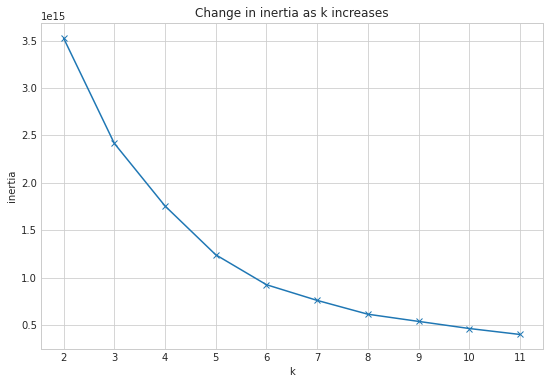

In [17]:
#Now determine number of clusters to make using elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(cluster_df).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Based on the above graph, I would say 6 clusters is a good choice.

In [18]:
#Create the KMeans model
kmeans = KMeans(n_clusters = 6, random_state = 123)

#Fit the model
kmeans.fit(cluster_df)

#Make predictions and assign the values to the original train data set
train['age_location_cluster'] = kmeans.predict(cluster_df)

__Group 2: Property Size__

In [19]:
#Copy the train data set and remove unnecessary vars
cluster_df = train.copy()
cluster_df = cluster_df[['home_square_feet', 'bath_bed_ratio', 'acres']]

In [20]:
#Scale the data
scaler = MinMaxScaler()

#Fit and transform the data
scaler.fit_transform(cluster_df)

array([[0.20380435, 0.16666667, 0.00103991],
       [0.10222567, 0.10714286, 0.00062088],
       [0.13211698, 0.16666667, 0.00083262],
       ...,
       [0.18206522, 0.16666667, 0.00128824],
       [0.09601449, 0.04761905, 0.00085557],
       [0.17326605, 0.28571429, 0.00101524]])

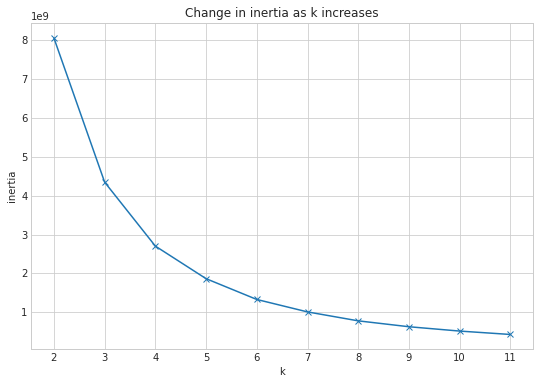

In [21]:
#Now determine number of clusters to make using elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(cluster_df).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Based on the above graph, 5 clusters looks about right.

In [22]:
#Create the KMeans model
kmeans = KMeans(n_clusters = 5, random_state = 123)

#Fit the model
kmeans.fit(cluster_df)

#Make predictions and assign values to original train data set
train['size_cluster'] = kmeans.predict(cluster_df)

__Group 3: Property Value__

In [23]:
#Copy the train data set and remove unnecessary vars
cluster_df = train.copy()
cluster_df = cluster_df[['structure_dollar_per_sqft', 'land_dollar_per_sqft']]

In [24]:
#Scale the data
scaler = MinMaxScaler()

#Fit and transform
scaler.fit_transform(cluster_df)

array([[0.06185587, 0.00448653],
       [0.12193004, 0.05615011],
       [0.04235903, 0.02625834],
       ...,
       [0.09118012, 0.04047574],
       [0.02822643, 0.00655914],
       [0.07958702, 0.02057297]])

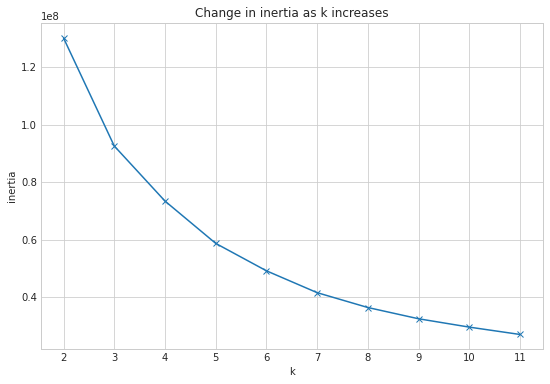

In [25]:
#Now determine number of clusters to make using elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(cluster_df).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Based on the above graph, I'd say 5 clusters is a good choice.

In [26]:
#Create the KMeans model
kmeans = KMeans(n_clusters = 5, random_state = 123)

#Fit the model
kmeans.fit(cluster_df)

#Make predictions and assign values to original train dataset
train['value_cluster'] = kmeans.predict(cluster_df)

### Is the Age and Location cluster useful?

<Figure size 1152x576 with 0 Axes>

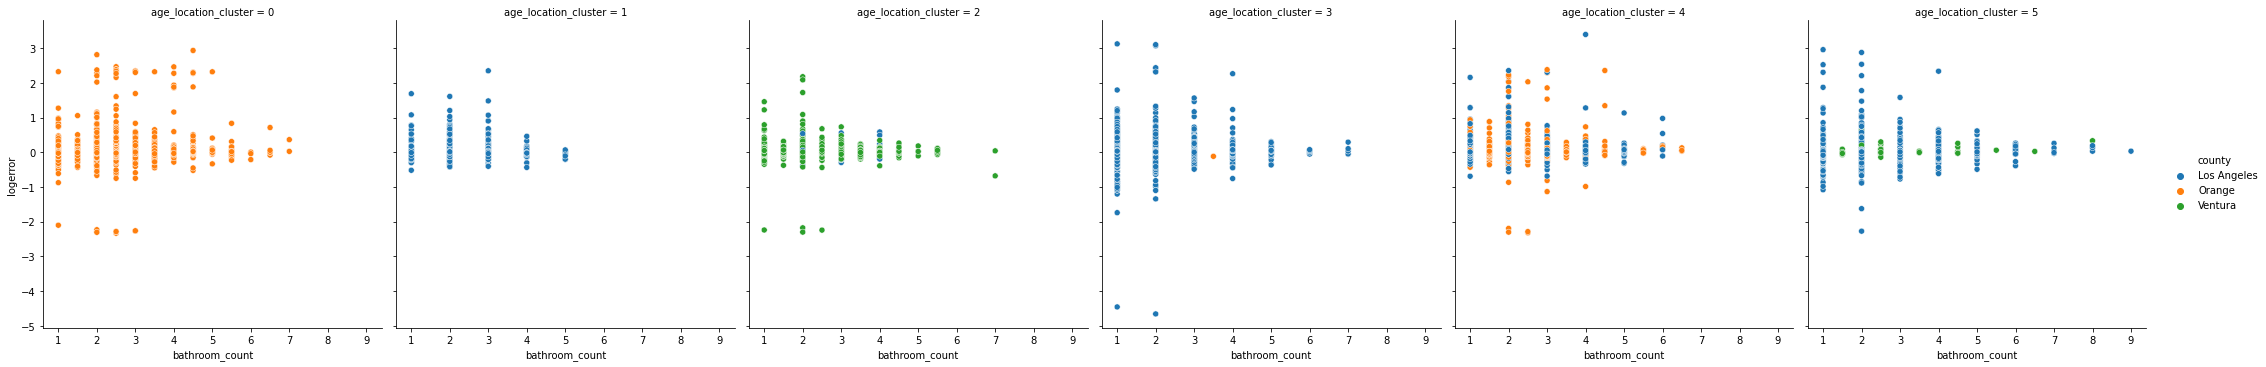

<Figure size 1152x576 with 0 Axes>

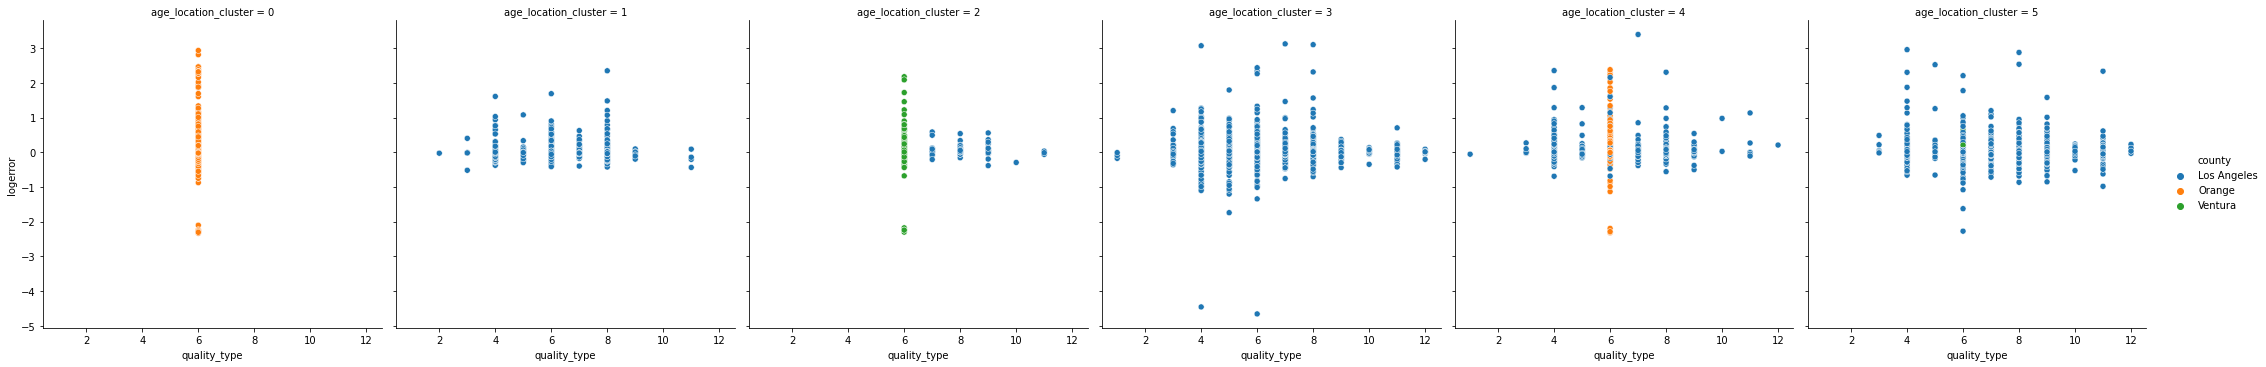

<Figure size 1152x576 with 0 Axes>

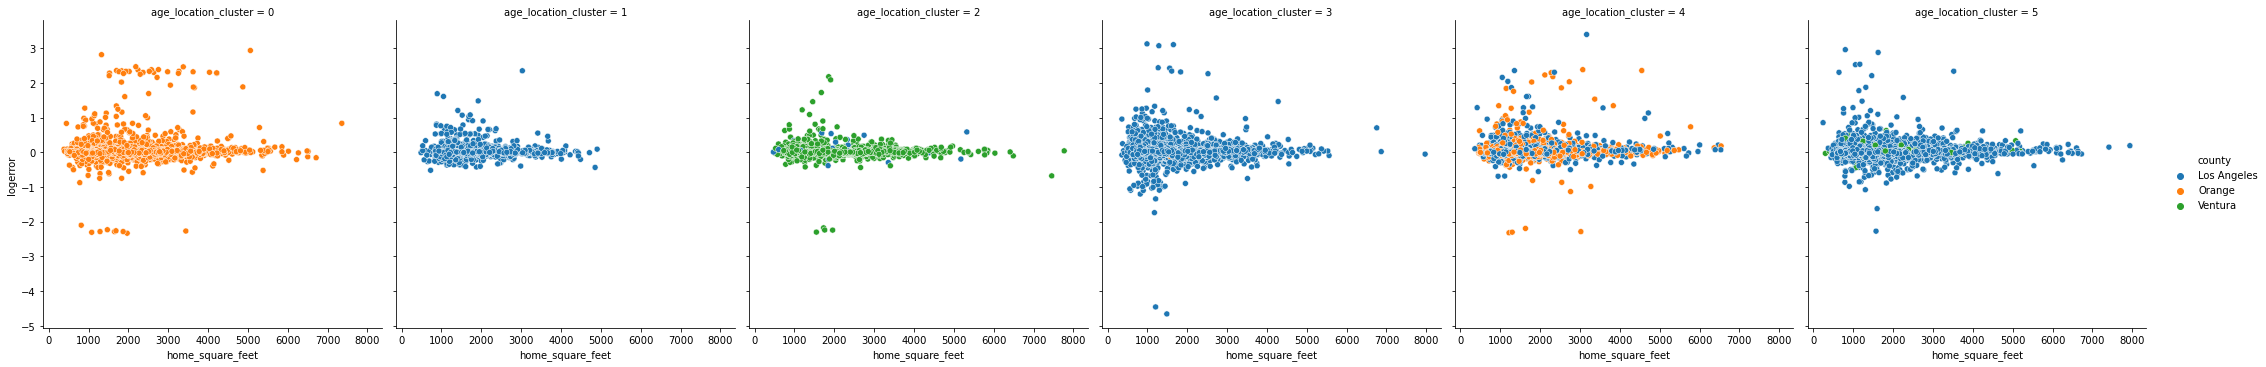

<Figure size 1152x576 with 0 Axes>

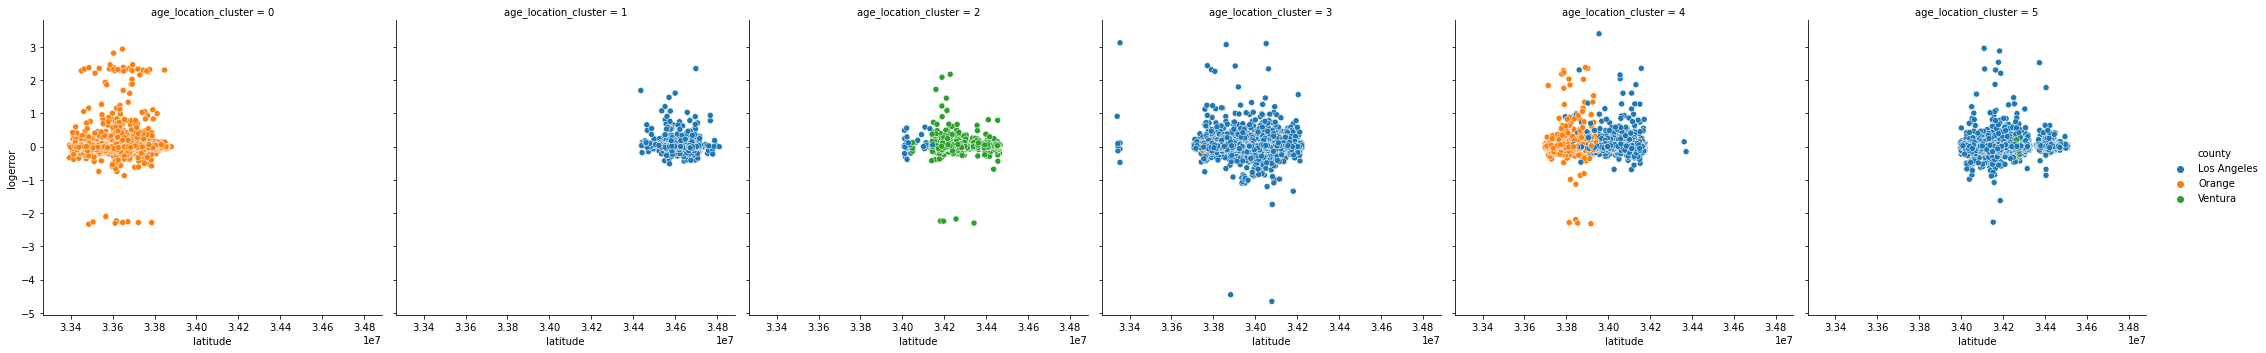

<Figure size 1152x576 with 0 Axes>

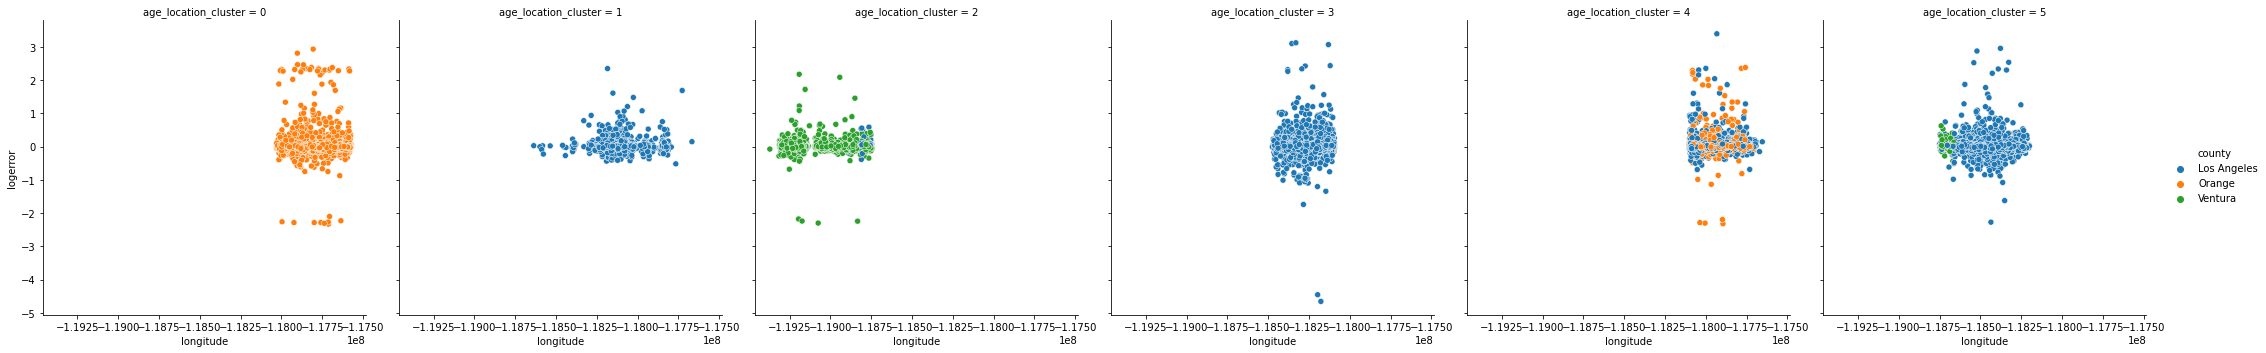

<Figure size 1152x576 with 0 Axes>

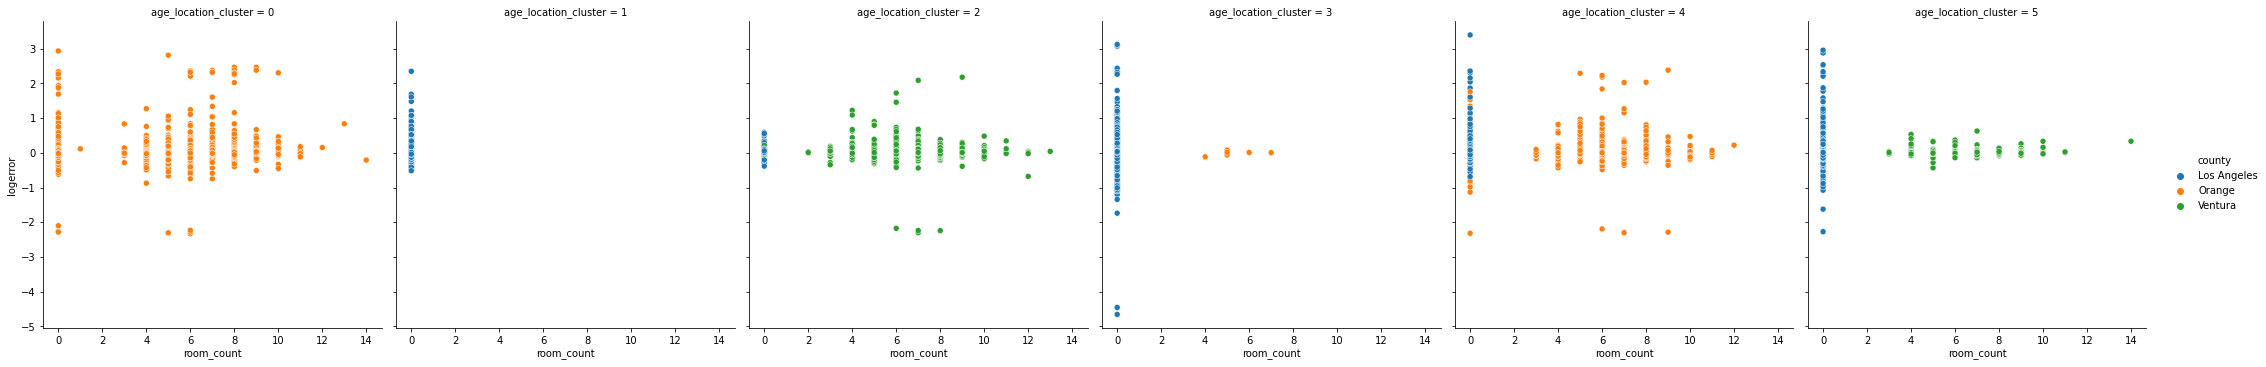

<Figure size 1152x576 with 0 Axes>

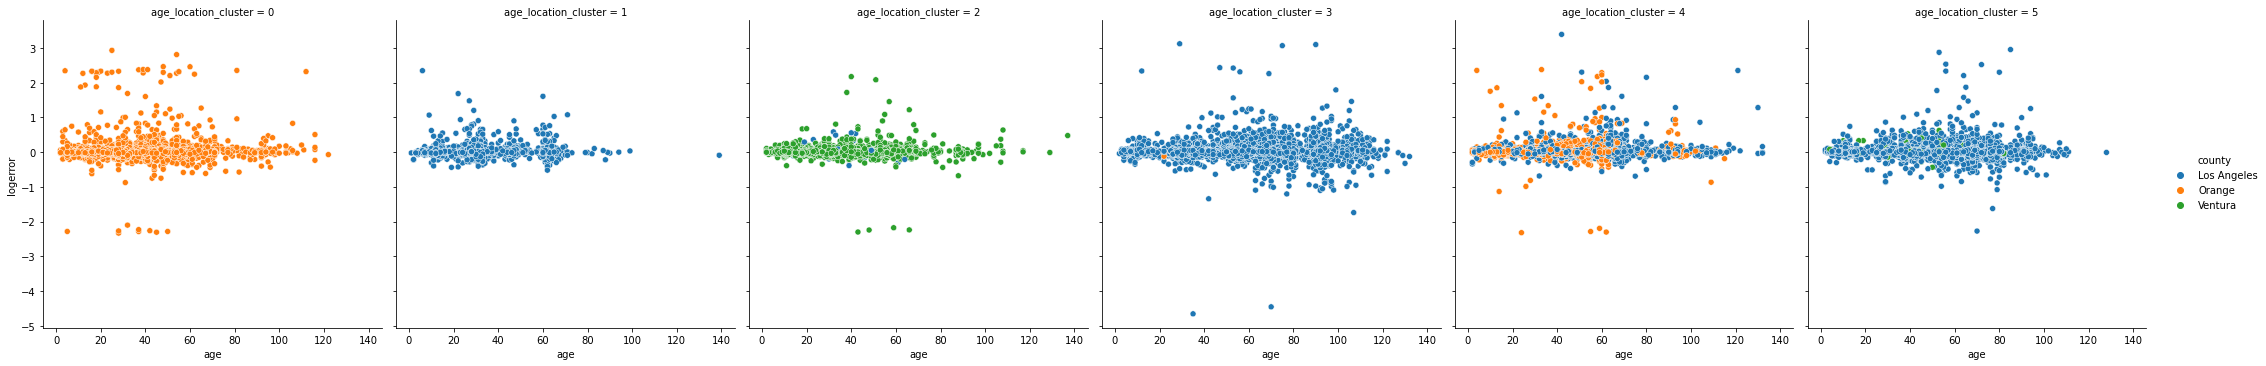

<Figure size 1152x576 with 0 Axes>

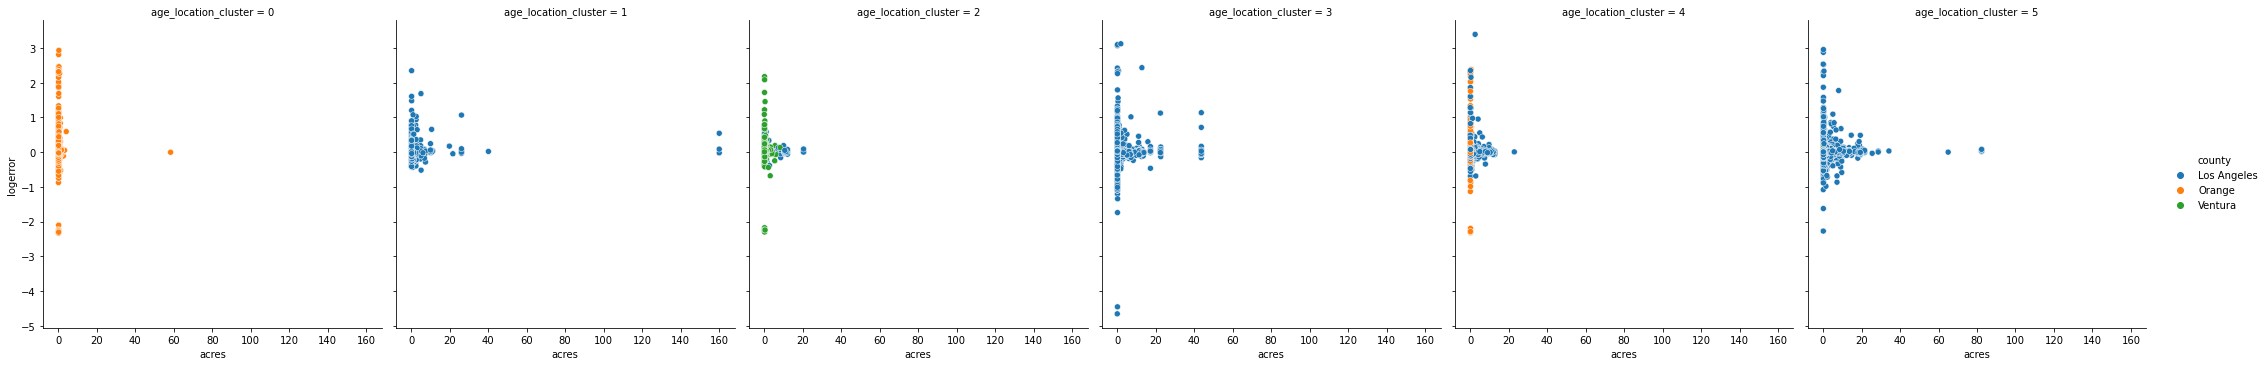

<Figure size 1152x576 with 0 Axes>

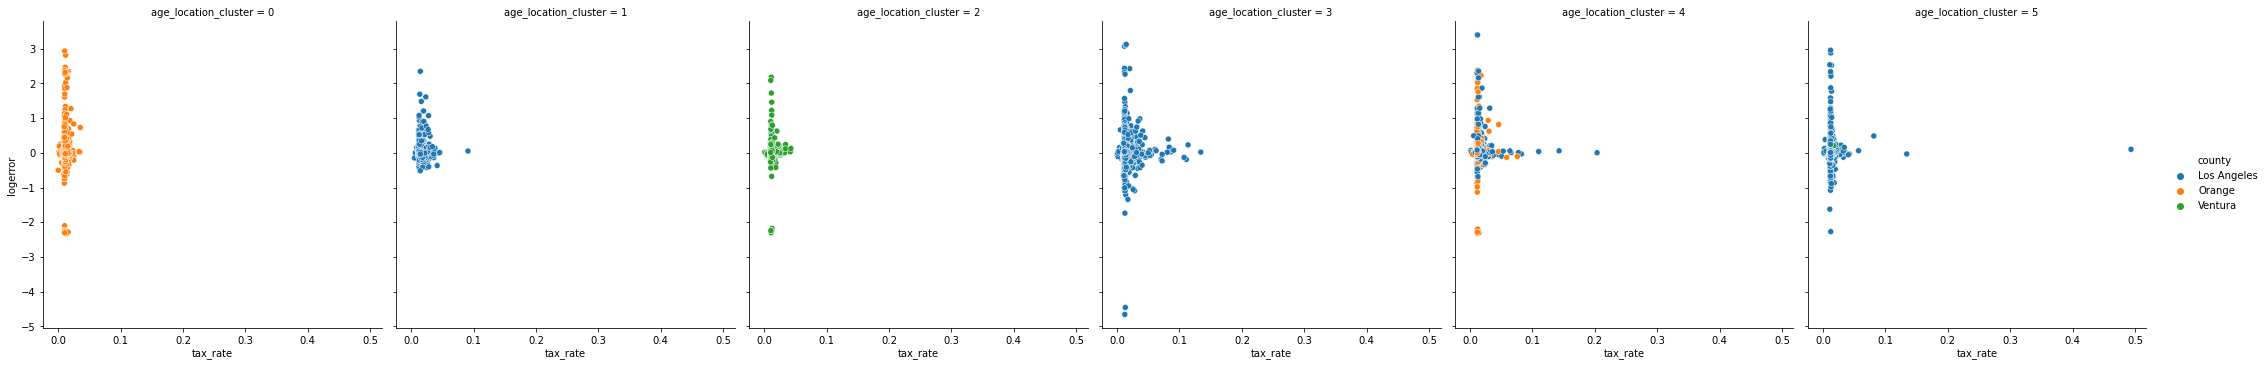

<Figure size 1152x576 with 0 Axes>

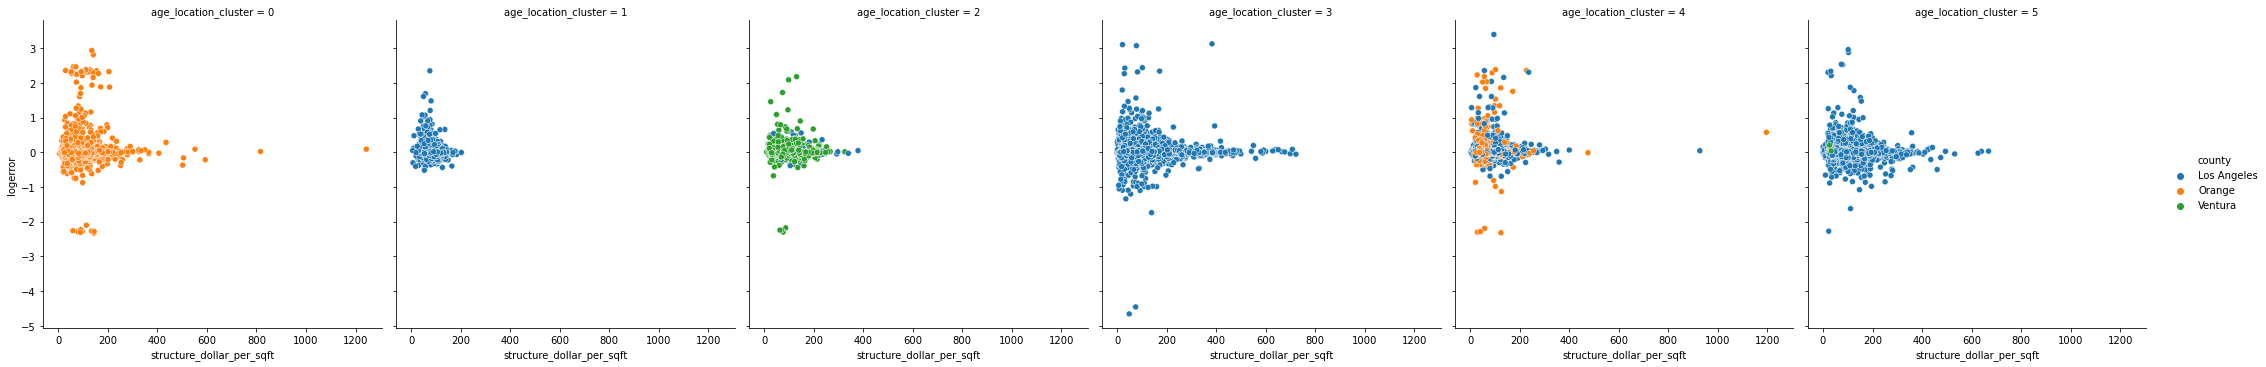

<Figure size 1152x576 with 0 Axes>

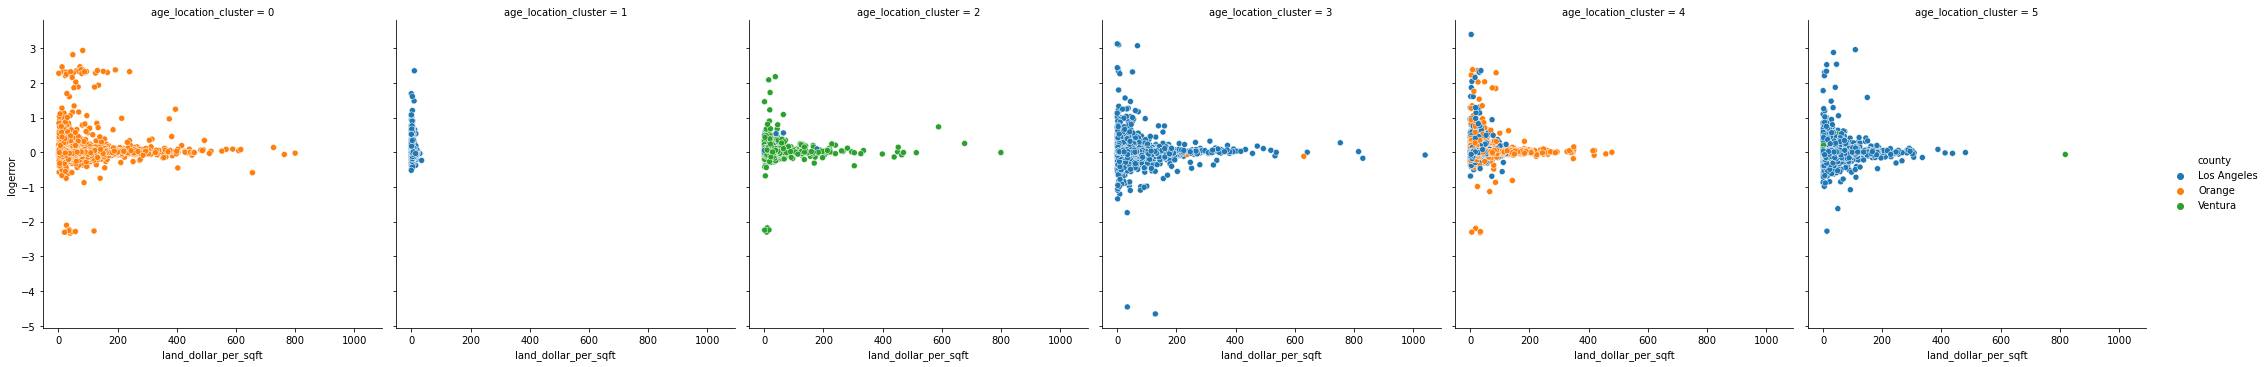

<Figure size 1152x576 with 0 Axes>

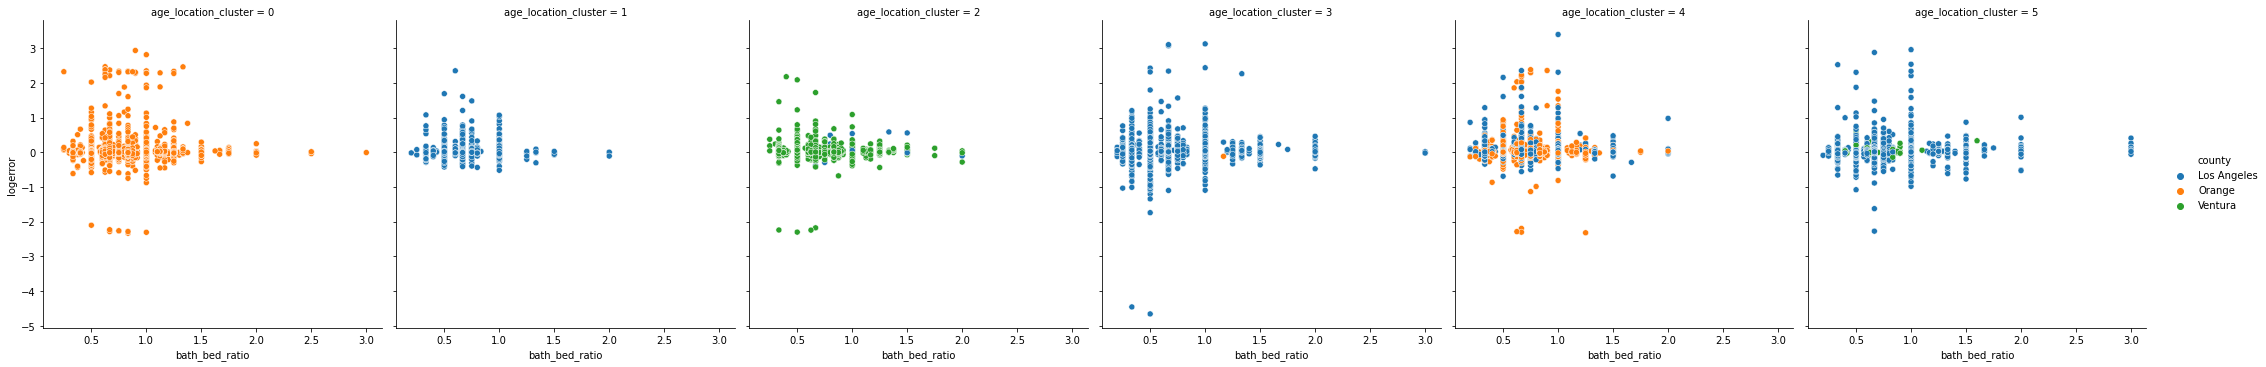

In [28]:
#Visualize the clusters against logerror
for col in num_cols:
    if col == 'logerror':
        continue
    else:
        plt.figure(figsize=(16, 8))
        sns.relplot(x = col, y = 'logerror', hue = 'county', col = 'age_location_cluster', data = train)
        plt.show()

I didn't see anything that really stood out in the above graphs. Maybe some statistical analysis can help.

### Statistical Analysis for Group 1

__Hypothesis 1__

$H_0$: The average logerror for properties in age_location cluster group 5 == The average logerror for properties in age_location cluster group 0.

$H_a$: The average logerror for properties in age_location cluster group 5 != The average logerror for properties in age_location cluster group 0.

alpha = 0.05

In [38]:
t, p = stats.ttest_ind(train[train.age_location_cluster == 5].logerror, train[train.age_location_cluster == 0].logerror, equal_var = False)
t, p

(-2.472266466099344, 0.013439315519722075)

Since p-value is less than 0.05, we reject the null hypothesis. Average logerror for properties in age_location_cluster group 5 is significantly different than the average logerror for age_location_cluster group 0.

__Hypothesis 2__

$H_0$: The average logerror for properties in age_location cluster group 1 == The average logerror for properties in age_location cluster group 4.

$H_a$: The average logerror for properties in age_location cluster group 1 != The average logerror for properties in age_location cluster group 4.

alpha = 0.05

In [39]:
t, p = stats.ttest_ind(train[train.age_location_cluster == 1].logerror, train[train.age_location_cluster == 4].logerror, equal_var = False)
t, p

(-1.0916564627815077, 0.2750698555947384)

Since p-value is greater than 0.05, we fail to reject the null hypothesis. Average logerror for properties in age_location_cluster group 1 is not significantly different than the average logerror for properties in age_location_cluster group 4.

__Hypothesis 3__

$H_0$: The average logerror for properties in age_location cluster group 2 == The average logerror for properties in age_location cluster group 3.

$H_a$: The average logerror for properties in age_location cluster group 2 != The average logerror for properties in age_location cluster group 3.

alpha = 0.05

In [40]:
t, p = stats.ttest_ind(train[train.age_location_cluster == 2].logerror, train[train.age_location_cluster == 3].logerror, equal_var = False)
t, p

(2.214228870020707, 0.026853116293728305)

Since the p-value is less than 0.05, we reject the null hypothesis. Average logerror for properties in age_location_cluster group 2 is significantly different than the average logerror for properties in age_location_cluster 3.

### Age_location_cluster is useful.
***

### Is the Property Size cluster useful?

<Figure size 1152x576 with 0 Axes>

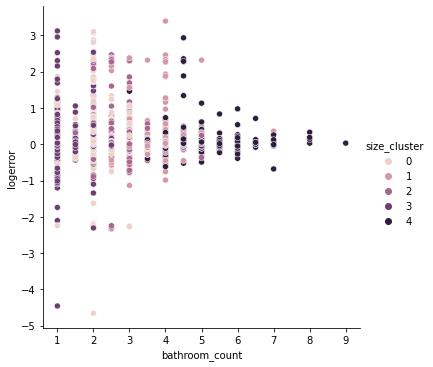

<Figure size 1152x576 with 0 Axes>

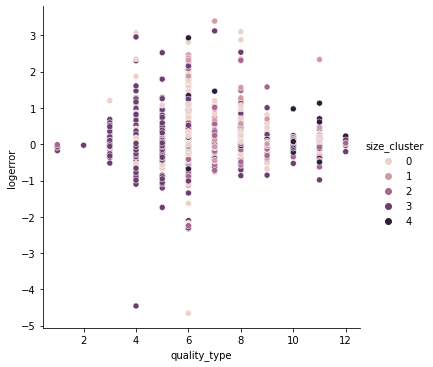

<Figure size 1152x576 with 0 Axes>

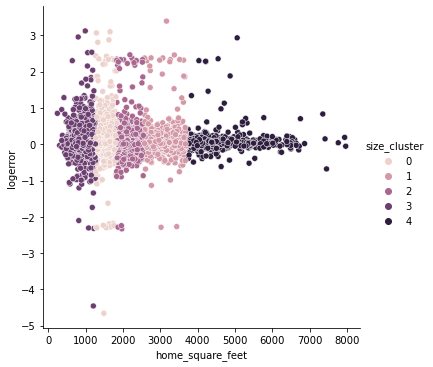

<Figure size 1152x576 with 0 Axes>

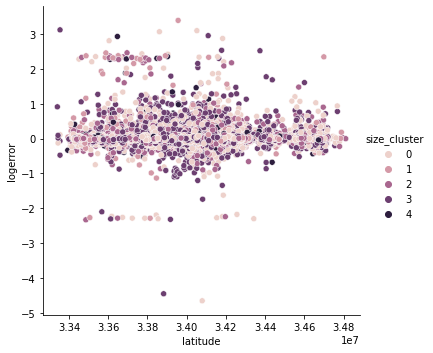

<Figure size 1152x576 with 0 Axes>

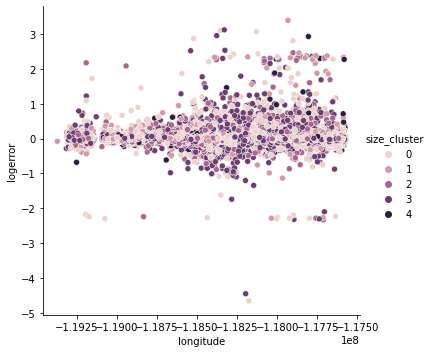

<Figure size 1152x576 with 0 Axes>

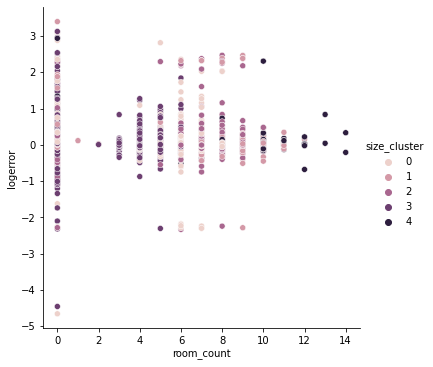

<Figure size 1152x576 with 0 Axes>

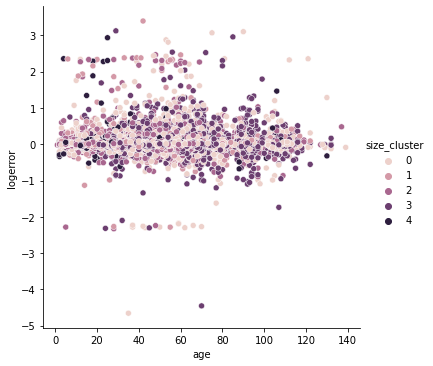

<Figure size 1152x576 with 0 Axes>

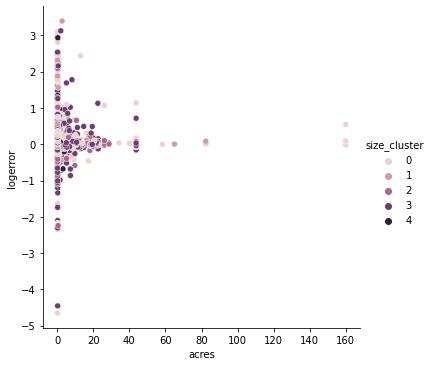

<Figure size 1152x576 with 0 Axes>

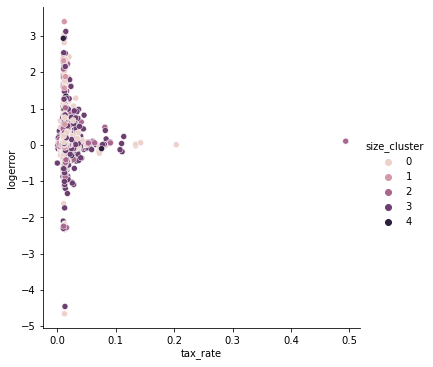

<Figure size 1152x576 with 0 Axes>

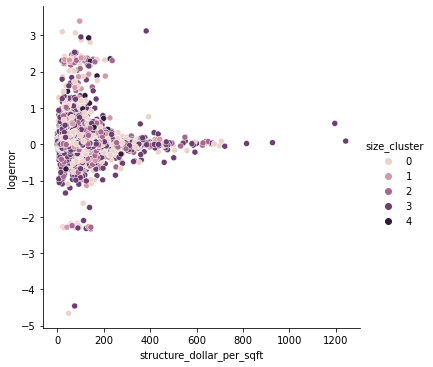

<Figure size 1152x576 with 0 Axes>

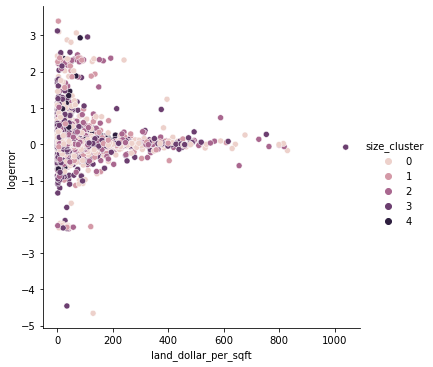

<Figure size 1152x576 with 0 Axes>

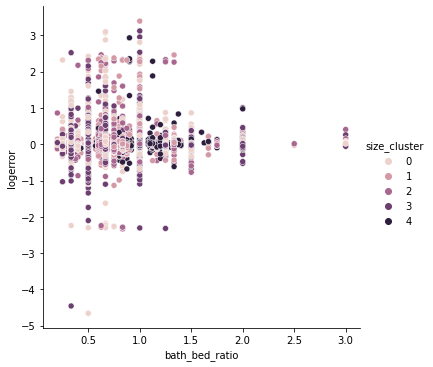

In [34]:
#Visualize the clusters against logerror
for col in num_cols:
    if col == 'logerror':
        continue
    else:
        plt.figure(figsize=(16, 8))
        sns.relplot(x = col, y = 'logerror', hue = 'size_cluster', data = train)
        plt.show()

Again, not much was clear from just looking at the graphs. Lets do some statistical analysis.

__Hypothesis 1__

$H_0$: Average logerror for properties in size_cluster 4 == Average logerror for properties in size_cluster 0.

$H_a$: Average logerror for properties in size_cluster 4 != Average logerror for properties in size_cluster 0.

alpha = 0.05

In [35]:
t, p = stats.ttest_ind(train[train.size_cluster == 4].logerror, train[train.size_cluster == 0].logerror, equal_var = False)
t, p

(4.802481434630899, 1.8312755635884396e-06)

Since p-value is less than 0.05, we reject the null hypothesis. Average logerror for properties in size_cluster group 4 is significantly different than the average logerror for properties in size_cluster group 0.

__Hypothesis 2__

$H_0$: Average logerror for properties in size_cluster 1 == Average logerror for properties in size_cluster 3.

$H_a$: Average logerror for properties in size_cluster 1 != Average logerror for properties in size_cluster 3.

alpha = 0.05

In [37]:
t, p = stats.ttest_ind(train[train.size_cluster == 1].logerror, train[train.size_cluster == 3].logerror, equal_var = False)
t, p

(5.391286246374134, 7.329793001772591e-08)

Since p-value is less than 0.05, we reject the null hypothesis. Average logerror for properties in size_cluster group 1 is significantly different than the average logerror for properties in size_cluster group 3.

__Hypothesis 3__

$H_0$: Average logerror for properties in size_cluster 2 == Average logerror for properties in size_cluster 3.

$H_a$: Average logerror for properties in size_cluster 2 != Average logerror for properties in size_cluster 3.

alpha = 0.05

In [41]:
t, p = stats.ttest_ind(train[train.size_cluster == 2].logerror, train[train.size_cluster == 3].logerror, equal_var = False)
t, p

(3.342446591232866, 0.0008324633679806386)

Since p-value is less than 0.05, we reject the null hypothesis. Average logerror for properties in size_cluster 2 is significantly different than the average logerror for properties in size_cluster 3.

### Size_cluster is useful.
***

### Is the value_cluster useful?

<Figure size 1152x576 with 0 Axes>

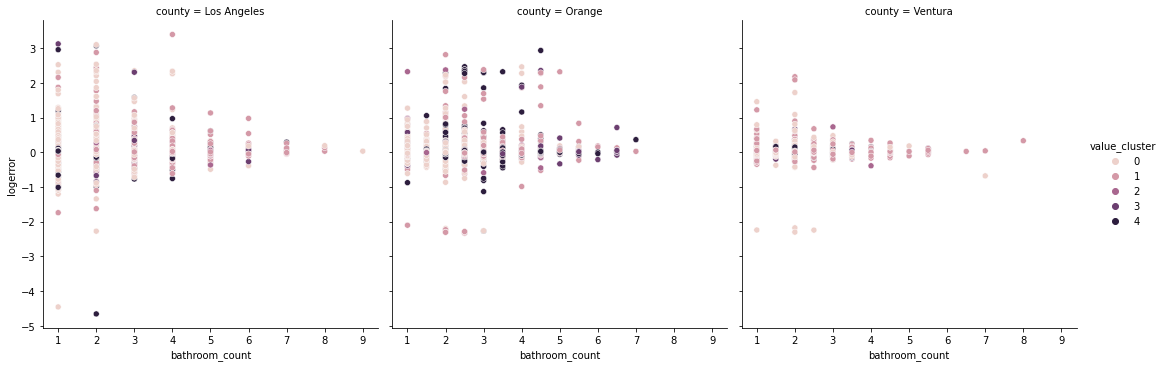

<Figure size 1152x576 with 0 Axes>

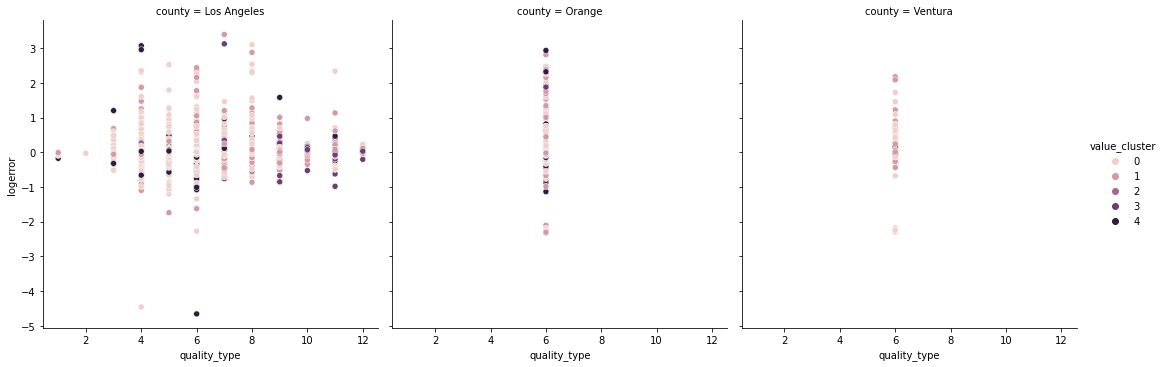

<Figure size 1152x576 with 0 Axes>

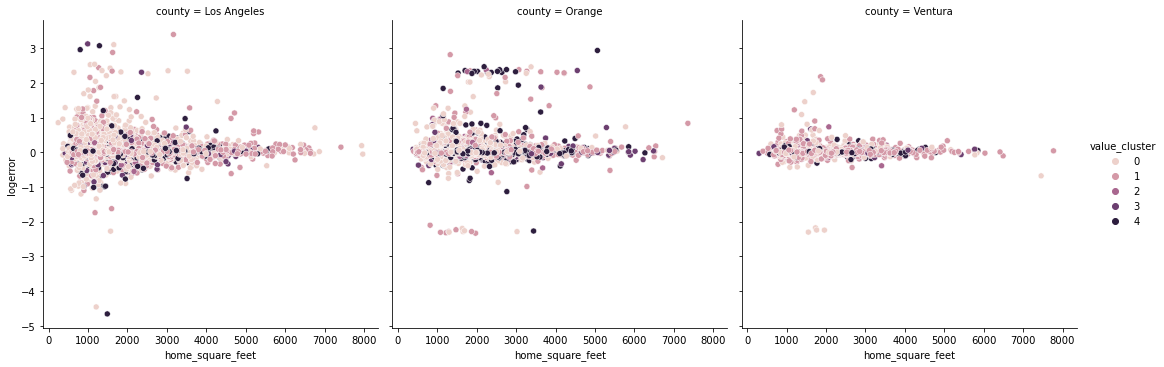

<Figure size 1152x576 with 0 Axes>

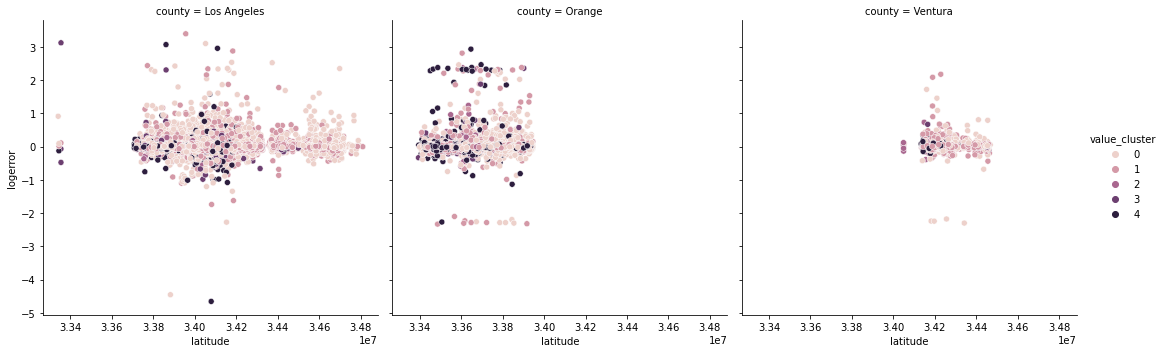

<Figure size 1152x576 with 0 Axes>

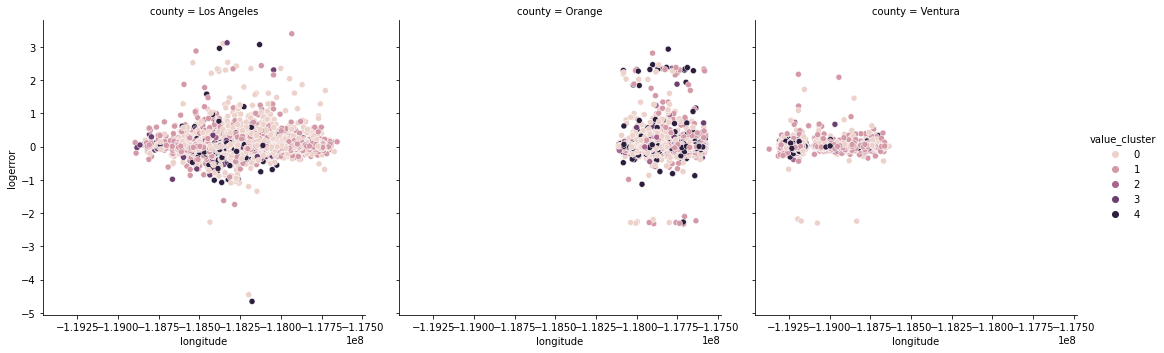

<Figure size 1152x576 with 0 Axes>

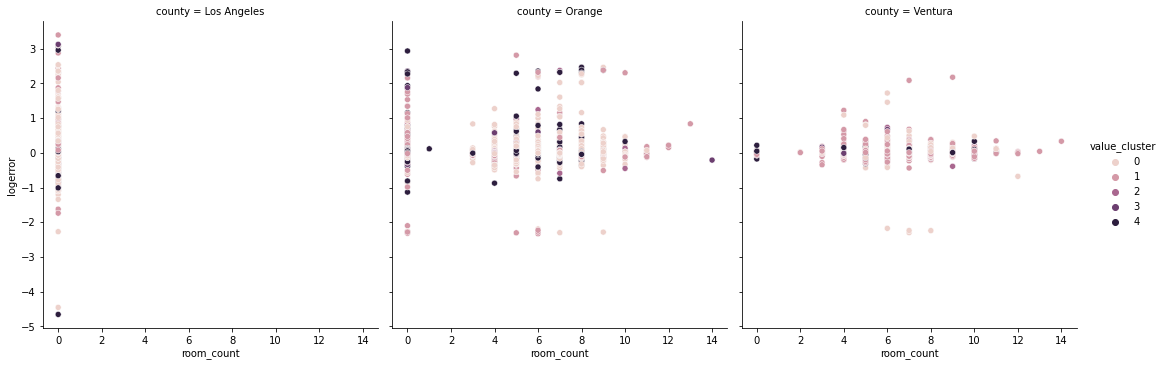

<Figure size 1152x576 with 0 Axes>

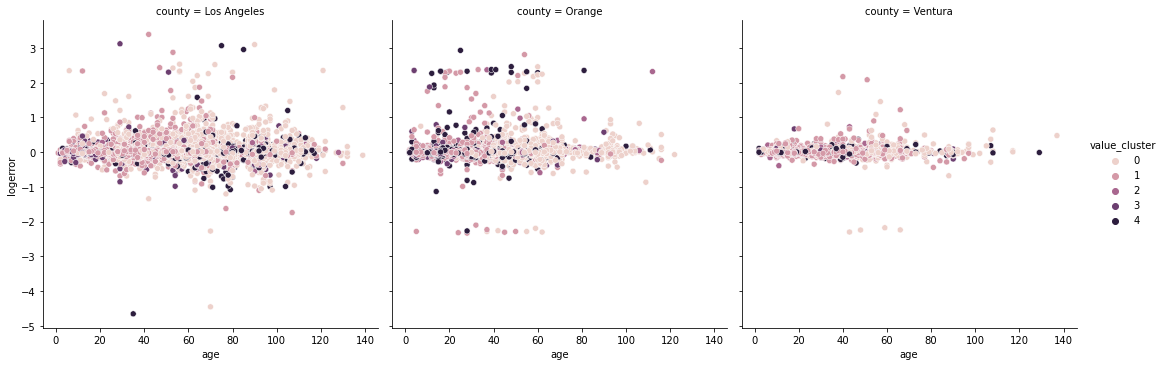

<Figure size 1152x576 with 0 Axes>

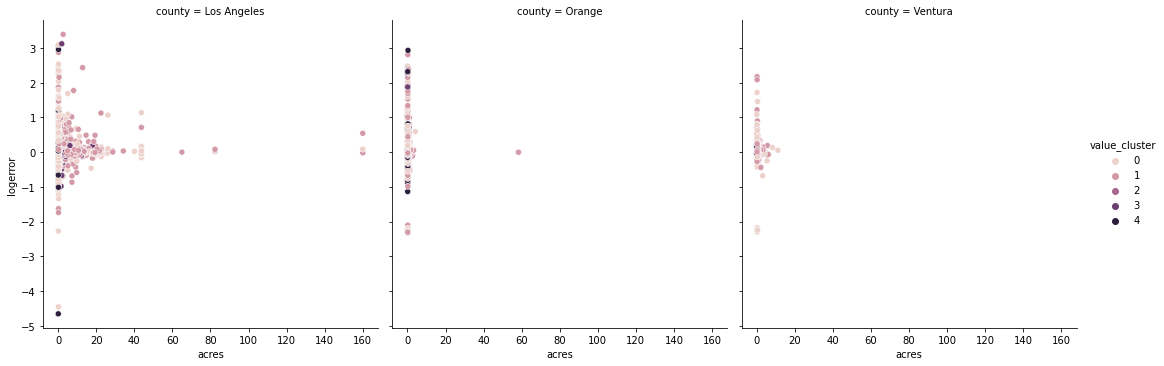

<Figure size 1152x576 with 0 Axes>

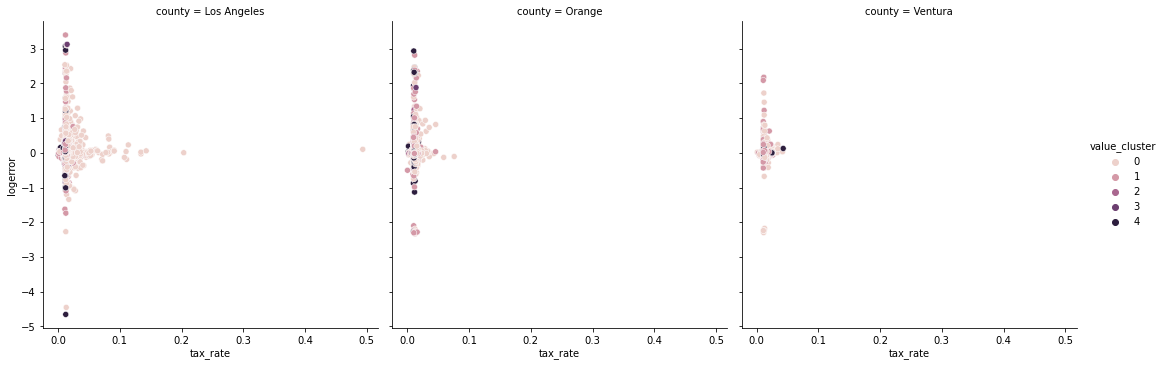

<Figure size 1152x576 with 0 Axes>

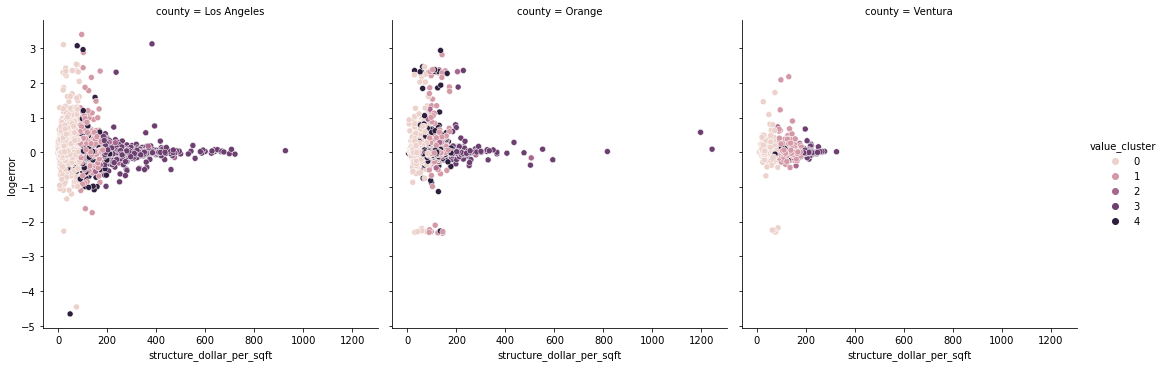

<Figure size 1152x576 with 0 Axes>

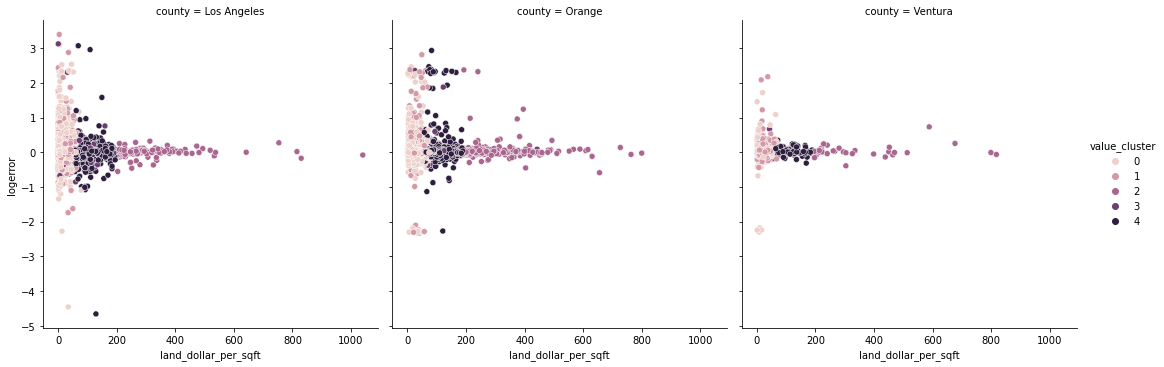

<Figure size 1152x576 with 0 Axes>

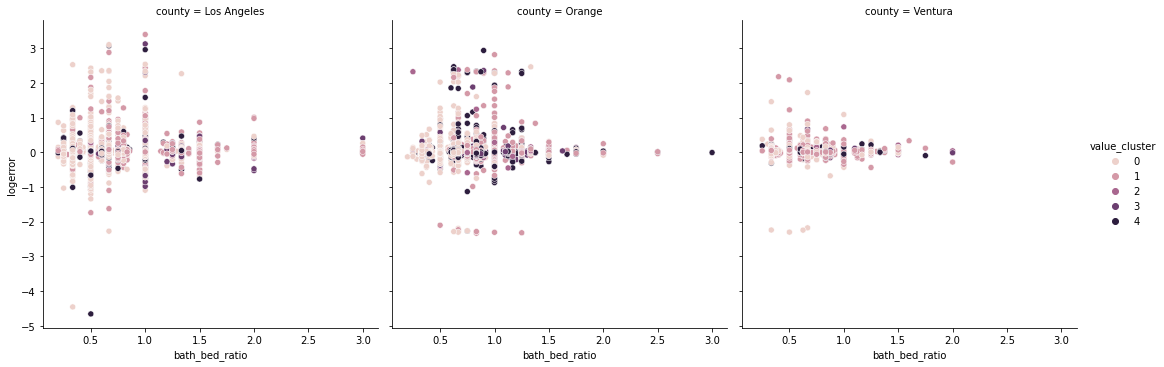

In [67]:
#Visualize the clusters against logerror
for col in num_cols:
    if col == 'logerror':
        continue
    else:
        plt.figure(figsize=(16, 8))
        sns.relplot(x = col, y = 'logerror', col = 'county', hue = 'value_cluster', data = train)
        plt.show()

Based on the above graphs, I'd like to test whether or not value_cluster group 4 properties have a higher average logerror than value_cluster group 0 properties.

__Hypothesis 1__

$H_0$: Average logerror for properties in value_cluster 0 == Average logerror for properties in value_cluster 4.

$H_a$: Average logerror for properties in value_cluster 0 != Average logerror for properties in value_cluster 4.

alpha = 0.05

In [47]:
t, p = stats.ttest_ind(train[train.value_cluster == 0].logerror, train[train.value_cluster == 4].logerror, equal_var = False)
t, p

(1.7650158086936971, 0.07759277894279942)

Since p-value is greater than 0.05, we fail to reject the null hypothesis. Average logerror for properties in value_cluster group 0 is not significantly different than the average logerror for properties in value_cluster group 4.

__Hypothesis 2__

$H_0$: Average logerror for properties in value_cluster 1 == Average logerror for properties in value_cluster 3.

$H_a$: Average logerror for properties in value_cluster 1 != Average logerror for properties in value_cluster 3.

alpha = 0.05

In [62]:
t, p = stats.ttest_ind(train[train.value_cluster == 1].logerror, train[train.value_cluster == 3].logerror, equal_var = False)
t, p

(1.1125596306702221, 0.26602726680494837)

Since p-value is greater than 0.05, we fail to reject the null hypothesis. Average logerror for properties in value_cluster group 1 is not significantly different than the average logerror for properties in value_cluster group 3.

__Hypothesis 3__

$H_0$: Average logerror for properties in value_cluster 0 == Average logerror for properties in value_cluster 1.

$H_a$: Average logerror for properties in value_cluster 0 != Average logerror for properties in value_cluster 1.

alpha = 0.05

In [63]:
t, p = stats.ttest_ind(train[train.value_cluster == 0].logerror, train[train.value_cluster == 1].logerror, equal_var = False)
t, p

(3.8548799271637417, 0.00011602797209714789)

Since p-value is less than 0.05, we reject the null hypothesis. Average logerror for properties in value_cluster 0 is significantly different than the average logerror for properties in value_cluster group 1.

__Hypothesis 4__

$H_0$: Average logerror for properties in value_cluster 0 == Average logerror for properties in value_cluster 3.

$H_a$: Average logerror for properties in value_cluster 0 != Average logerror for properties in value_cluster 3.

alpha = 0.05

In [66]:
t, p = stats.ttest_ind(train[train.value_cluster == 0].logerror, train[train.value_cluster == 3].logerror, equal_var = False)
t, p

(2.8506798173932855, 0.0044041171627451706)

Since p-value is less than 0.05, we reject the null hypothesis. Average logerror for properties in value_cluster 0 is significantly different than the average logerror for properties in value_cluster group 3.

### value_cluster is useful.